In [2]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
%matplotlib inline

import sklearn as sk

In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
#pixels are in 28*28

28*28

784

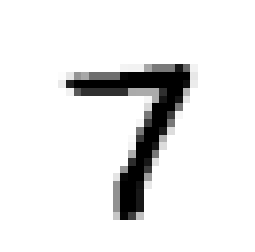

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[46000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [8]:
y[46000]


7.0

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# 3.1(a) SGD Classifier with max_iter =5

In [10]:

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

c:\users\vrish\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.87492501,  0.85444272,  0.86452968])

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.874925014997
0.854442722136
0.864529679452


In [278]:

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [279]:
from sklearn.metrics import confusion_matrix

conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5701,    6,   36,   23,    9,   40,   26,    2,   64,   16],
       [   1, 6519,   24,   27,    6,    8,    2,   10,  133,   12],
       [  88,  198, 4851,  242,   61,   10,   73,   58,  351,   26],
       [  41,   80,  122, 5075,   22,  339,   13,   50,  280,  109],
       [  24,   80,   67,   26, 4798,   14,   33,   14,  356,  430],
       [  92,   87,   48,  307,   84, 3935,   72,   24,  645,  127],
       [  87,   52,   80,   29,   52,  100, 5376,    1,  133,    8],
       [  44,   60,   61,  124,   79,   14,    2, 5347,  131,  403],
       [  67,  377,   71,  147,   31,  149,   17,   18, 4879,   95],
       [  46,   73,   55,  111,  179,   40,    2,  163,  271, 5009]], dtype=int64)

In [280]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [281]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

In [282]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


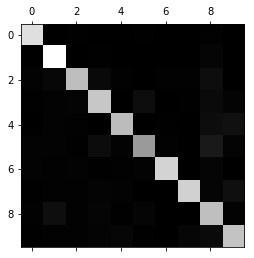

In [283]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [284]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

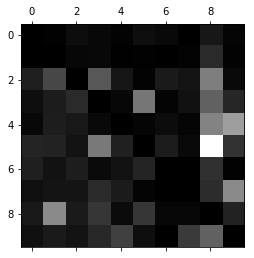

In [285]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

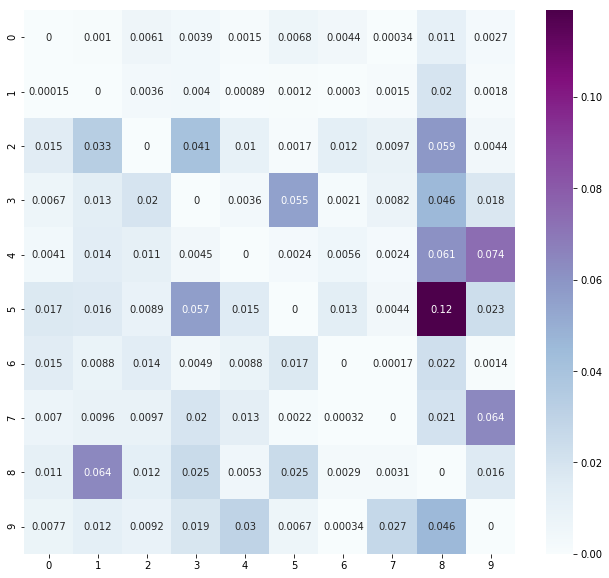

In [286]:
import seaborn as sns
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

In [13]:
from sklearn.metrics import confusion_matrix
y_pred=sgd_clf.predict(X_test)
conf_mx=confusion_matrix(y_pred, y_test)
conf_mx

array([[ 965,    1,   21,    3,    1,   17,   23,   10,   30,   14],
       [   0, 1058,    6,    0,    1,    1,    2,    2,    6,    3],
       [   2,   17,  907,   14,    5,    6,   15,   42,   44,    3],
       [   4,   38,   49,  955,    3,  114,    6,   39,  178,   24],
       [   0,    2,   15,    8,  939,   51,   26,   34,   94,  101],
       [   2,    0,    0,    8,    0,  651,   16,    0,   24,    3],
       [   2,    5,    7,    1,    2,    9,  868,    0,    7,    1],
       [   0,    0,    4,    2,    0,    2,    0,  708,    2,    1],
       [   0,    4,   18,    5,    2,   24,    2,    4,  535,    3],
       [   5,   10,    5,   14,   29,   17,    0,  189,   54,  856]], dtype=int64)

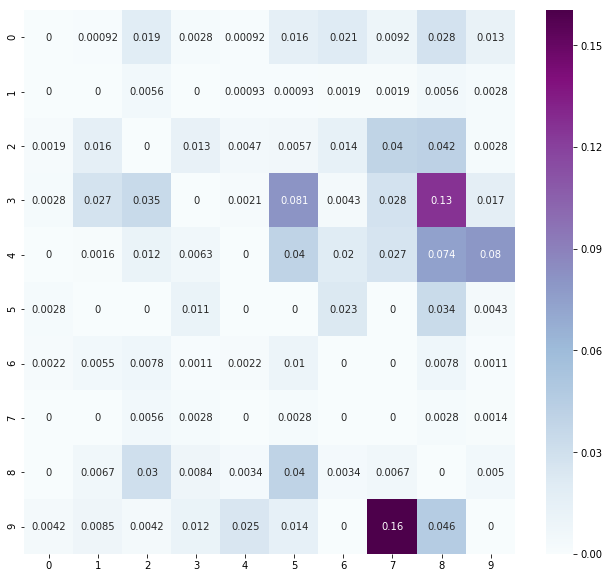

In [22]:

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
import seaborn as sns
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

In [291]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)
accuracy=accuracy*100
accuracy

87.060000000000002

# 3.1(b) Training set of 55000 and a test set of 15000 and a max_iter of 2

In [42]:
X_train, X_test, y_train, y_test = X[:55000], X[55000:], y[:55000], y[55000:]

In [43]:
import numpy as np

shuffle_index = np.random.permutation(55000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [44]:

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=2,n_iter=2)
sgd_clf.fit(X_train, y_train)

c:\users\vrish\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=2, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [26]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.86121714,  0.87802749,  0.88608838])

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.861217144727
0.878027492909
0.886088379705


In [298]:

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [299]:
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5510,    1,   17,    8,   21,   65,  133,   38,  130,    0],
       [   4, 5981,  135,    9,    8,   36,   86,   55,  417,   11],
       [  53,   31, 4938,   43,  114,   24,  286,  147,  315,    7],
       [  62,   32,  307, 4348,   25,  522,  119,  179,  501,   36],
       [  16,   19,   31,   14, 5205,   15,  137,  105,  246,   54],
       [ 107,   23,   32,  106,   83, 3987,  262,   57,  730,   34],
       [  53,    4,   60,    1,   64,  141, 5516,   10,   69,    0],
       [  41,   19,  123,    7,   71,    7,   17, 5811,  109,   60],
       [  84,   88,   88,   38,   92,  354,   97,  113, 4889,    8],
       [  12,    5,    7,   14,  130,   28,   14,  338,  112,  289]], dtype=int64)

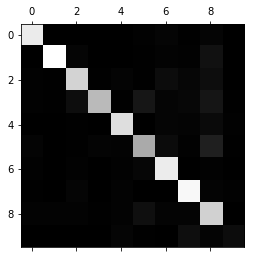

In [300]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [301]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

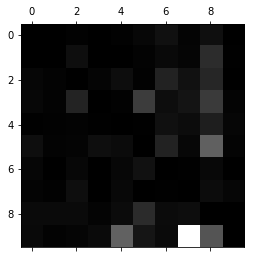

In [302]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

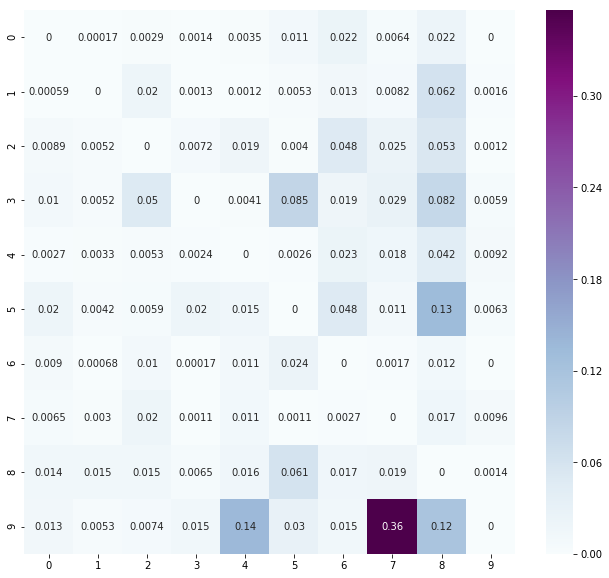

In [303]:
import seaborn as sns
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

In [30]:
y_pred=sgd_clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)
accuracy=accuracy*100
accuracy

59.973333333333336

In [47]:
from sklearn.metrics import confusion_matrix
y_pred=sgd_clf.predict(X_test)
conf_mx=confusion_matrix(y_pred, y_test)
conf_mx


array([[ 935,    0,    8,    2,    1,    8,    7,    0,    5,   68],
       [   0, 1093,    1,    0,    0,    1,    3,    6,    7,   40],
       [  11,    4,  943,   79,   27,   17,   22,   17,   32,  120],
       [   2,    1,    2,  728,    9,    3,    0,    1,    5,   48],
       [   0,    1,    6,    0,  834,    0,    1,    0,    4,  231],
       [  14,    3,    7,  136,    4,  797,   43,    3,  108,  341],
       [  11,    4,   14,    7,   14,   10,  872,    0,   10,    2],
       [   2,    3,   16,   24,   59,   13,    2,  989,   27, 2709],
       [   5,   26,   33,   31,   20,   41,    8,    7,  775,  147],
       [   0,    0,    2,    3,   14,    2,    0,    5,    1, 2303]], dtype=int64)

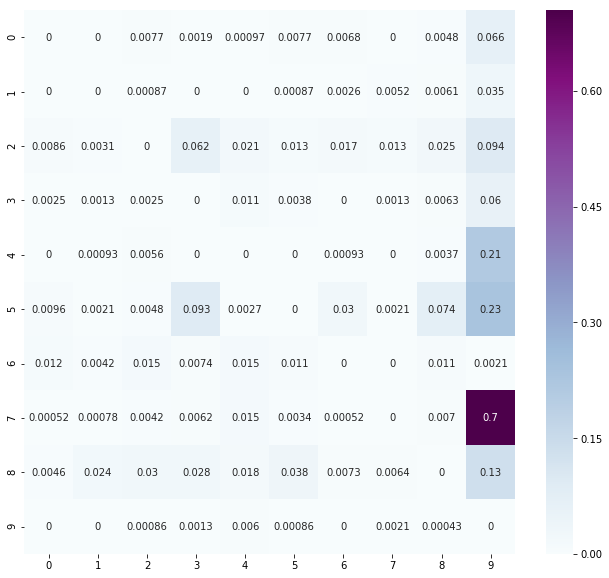

In [48]:

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
import seaborn as sns
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

# 3.1(c) Training set of 65000 and a test set of 5000 and a max_iter of 10

In [52]:
X_train, X_test, y_train, y_test = X[:65000], X[65000:], y[:65000], y[65000:]

In [53]:
shuffle_index = np.random.permutation(65000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
sgd_clf = SGDClassifier(random_state=42, max_iter=5)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [178]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.87125058,  0.86296501,  0.87333826])

In [179]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.871250576834
0.862965014308
0.873338257016


In [180]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [181]:
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

array([[6675,    1,   29,   40,   34,   20,   43,   12,   37,   12],
       [   2, 7465,   86,  105,   31,   17,    8,   21,   98,   44],
       [  75,   62, 6042,  312,   90,   16,   96,   71,  198,   28],
       [  29,   15,  200, 6583,   10,   80,   21,   40,   90,   73],
       [  37,   30,   50,   34, 6000,    4,   52,   35,   49,  394],
       [  91,   46,   61,  865,  153, 3594,  143,   34,  291,  143],
       [ 110,   21,  160,   27,   91,   60, 5398,    3,   35,   13],
       [  22,   19,  117,  114,   79,    6,    3, 5539,   28,  338],
       [  78,  217,  164,  695,   79,  162,   69,   53, 4144,  190],
       [  46,   40,   42,  185,  285,    9,    5,  244,   36, 5057]], dtype=int64)

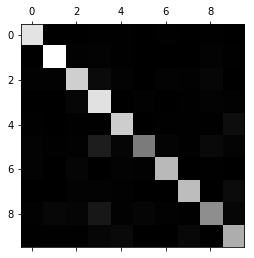

In [182]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [183]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

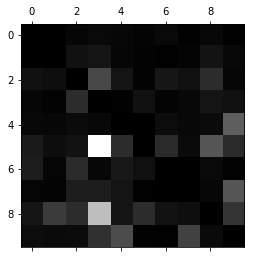

In [184]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

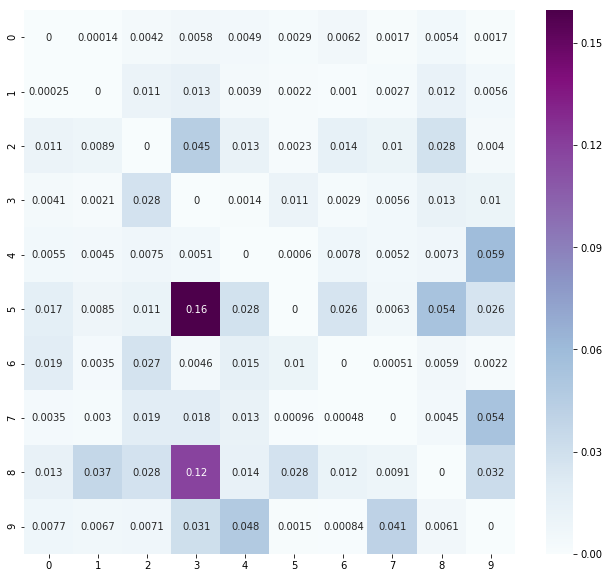

In [185]:
import seaborn as sns
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

In [54]:
y_pred=sgd_clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)
accuracy=accuracy*100
accuracy

87.700000000000003

# 3.2(a) Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
X_train, X_test, y_train, y_test = X[:65000], X[65000:], y[:65000], y[65000:]

In [38]:
shuffle_index = np.random.permutation(65000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [39]:
rfc_cld = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=None)

In [40]:
rfc_cld.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [320]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfc_cld, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.94070143,  0.94410597,  0.94317762])

In [321]:
y_train_pred = cross_val_predict(rfc_cld, X_train, y_train, cv=3)

In [322]:
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

array([[6785,    1,   15,   10,    9,   11,   31,    3,   30,    8],
       [   1, 7746,   43,   25,    9,   14,    8,   12,   12,    7],
       [  44,   24, 6655,   58,   45,   14,   43,   44,   51,   12],
       [  29,   23,  149, 6616,   10,  115,   10,   57,   90,   42],
       [  17,   15,   31,   10, 6395,    8,   34,   18,   22,  135],
       [  49,   27,   26,  205,   24, 4936,   48,   10,   60,   36],
       [  57,   16,   30,    7,   42,   68, 5667,    1,   29,    1],
       [  15,   33,   92,   36,   92,   11,    1, 5875,   19,   91],
       [  43,   64,   93,  148,   53,   95,   49,   17, 5224,   65],
       [  35,   20,   32,   97,  199,   51,    5,   96,   40, 5374]], dtype=int64)

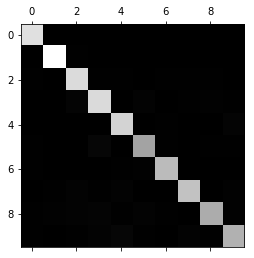

In [323]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [324]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

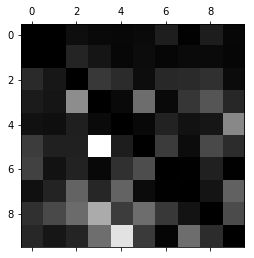

In [325]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

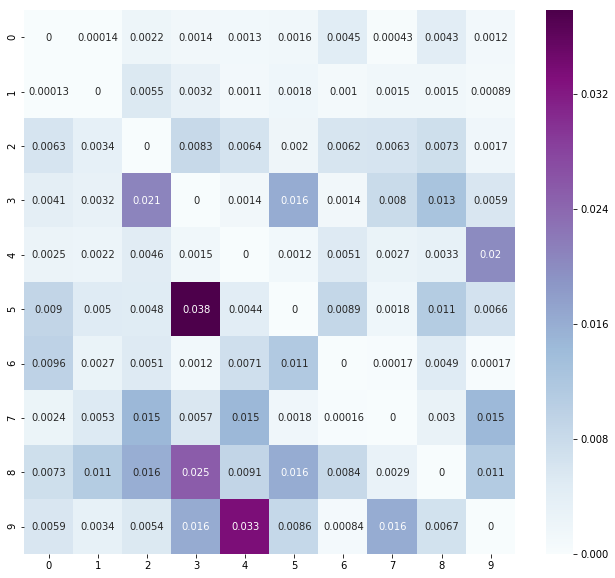

In [326]:
import seaborn as sns
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

In [330]:
y_pred=rfc_cld.predict(X_test)
accuracy_score=accuracy_score(y_pred,y_test)
accuracy=accuracy_score*100
accuracy

93.040000000000006

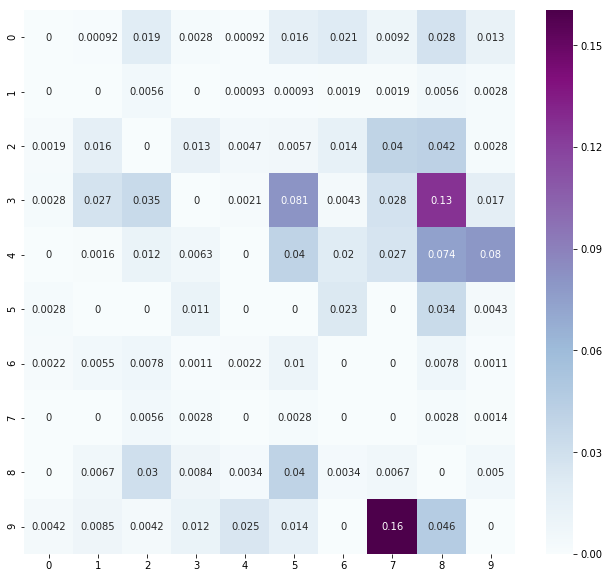

In [41]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
import seaborn as sns
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

# 3.2(b) 

In [353]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [354]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [355]:
rfc_cld = RandomForestClassifier(random_state=42, n_estimators=5, max_depth=2)

In [356]:
rfc_cld.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [357]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfc_cld, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.4505099 ,  0.45237262,  0.45926889])

In [358]:
y_train_pred = cross_val_predict(rfc_cld, X_train, y_train, cv=3)

In [359]:
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5404,  230,   51,   37,   57,    0,   40,   58,   12,   34],
       [  21, 6540,   72,   20,    2,    0,    0,   72,    2,   13],
       [ 888, 1259, 2996,  196,   70,    0,   69,  361,   90,   29],
       [ 937, 1498,  500, 2074,  120,    6,    2,  551,   90,  353],
       [ 207,  310,   63,  155, 2779,    0,  191,  751,   40, 1346],
       [2169,  888,  348,  530,  418,   17,   45,  231,   97,  678],
       [1063,  639,  882,  285,  963,    0, 1024,  550,  274,  238],
       [ 190,  776,  172,   87,  797,    0,   49, 3575,   22,  597],
       [ 259, 1679, 1451,  537,  398,    4,  350,  181,  678,  314],
       [ 135,  380,   43,  272, 1927,    0,   84,  934,   18, 2156]], dtype=int64)

In [360]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

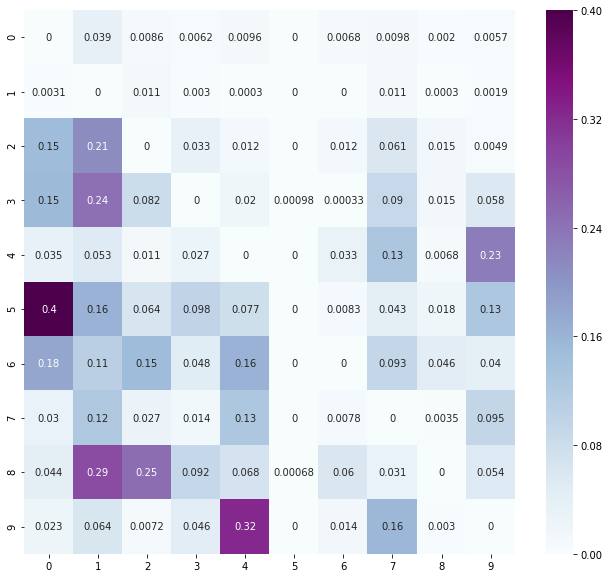

In [361]:
np.fill_diagonal(norm_conf_mx, 0)
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

In [380]:
y_pred=rfc_cld.predict(X_test)
y_pred=y_pred.astype(np.int32)
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_pred,y_test)
accuracy=accuracy_score*100
accuracy

45.350000000000001

In [382]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test, normalize=False)

4535

# 3.2(c)

In [383]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [384]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [385]:
rfc_cld = RandomForestClassifier(random_state=42, n_estimators=30, max_depth=35)

In [386]:
rfc_cld.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=35, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [387]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfc_cld, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.96020796,  0.96019801,  0.95899385])

In [388]:
y_train_pred = cross_val_predict(rfc_cld, X_train, y_train, cv=3)

In [389]:
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5847,    2,   10,    4,    5,    5,   14,    2,   32,    2],
       [   1, 6630,   39,   17,   15,    3,    5,   13,   10,    9],
       [  34,   11, 5718,   28,   31,    9,   22,   45,   46,   14],
       [   9,    8,  100, 5780,    3,   75,   12,   36,   72,   36],
       [   9,   12,   18,    2, 5636,    1,   27,   11,   12,  114],
       [  29,    9,   17,  104,   13, 5129,   49,    3,   44,   24],
       [  29,   17,   13,    1,   11,   47, 5780,    0,   20,    0],
       [   9,   24,   67,   10,   43,    2,    0, 6017,   15,   78],
       [  15,   38,   57,   67,   31,   59,   30,    7, 5474,   73],
       [  27,    7,   20,   72,  104,   26,    5,   60,   51, 5577]], dtype=int64)

In [390]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

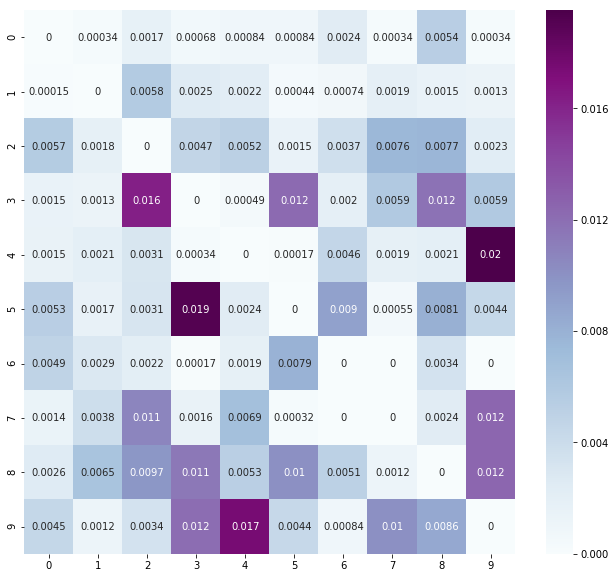

In [391]:
np.fill_diagonal(norm_conf_mx, 0)
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

In [396]:
from sklearn.metrics import accuracy_score
y_pred=rfc_cld.predict(X_test)
accuracy_score=accuracy_score(y_pred,y_test)
accuracy=accuracy_score * 100
accuracy

96.460000000000008

# 3.3(a) SVM classifier

In [4]:
from sklearn import svm

In [5]:
clf=svm.LinearSVC()

In [13]:
clf.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [14]:
y_pred=(X_test)

In [15]:
from sklearn.metrics import accuracy_score
y_pred=clf.predict(X_test)
accuracy_score=accuracy_score(y_pred,y_test)
accuracy=accuracy_score * 100
accuracy

86.719999999999999

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.80843831,  0.86334317,  0.87613142])

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5620,    0,   28,   29,   11,   88,   84,    7,   49,    7],
       [   3, 6496,   27,   38,    4,   38,   30,   12,   93,    1],
       [  71,  121, 4722,  172,   39,  134,  240,  103,  336,   20],
       [  41,   50,  169, 4837,   14,  433,   43,  117,  385,   42],
       [  26,   35,   64,   89, 4956,  109,  130,   55,  215,  163],
       [  85,   14,   35,  177,   35, 4538,  114,   34,  323,   66],
       [  38,   13,   73,   14,   28,  182, 5471,    3,   94,    2],
       [  20,   37,   60,  101,   68,   52,    5, 5642,   71,  209],
       [  53,  143,   91,  250,   21,  530,   54,   41, 4564,  104],
       [  48,   42,   30,  156,  193,  332,   13,  532,  776, 3827]], dtype=int64)

In [19]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

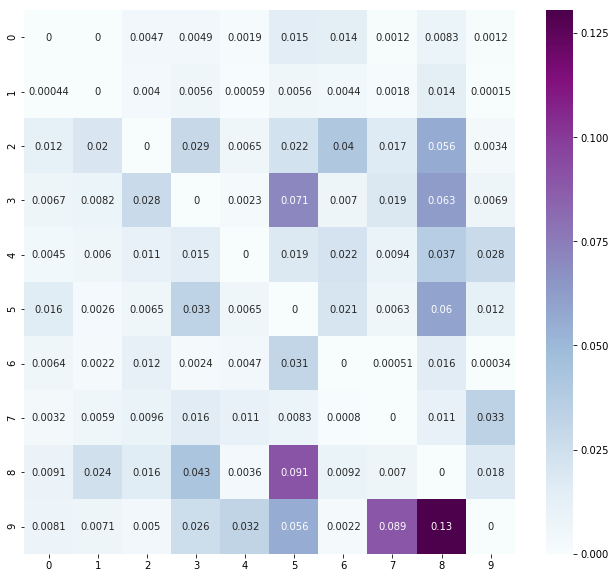

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

# 3.3(b)

In [26]:
X_train, X_test, y_train, y_test = X[:55000], X[55000:], y[:55000], y[55000:]
shuffle_index = np.random.permutation(55000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [27]:
clf=svm.LinearSVC(loss='hinge',  C=0.75, max_iter=200)

In [28]:
clf.fit(X_train,y_train)

LinearSVC(C=0.75, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=200, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [29]:
y_pred=(X_test)

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.87403206,  0.87137246,  0.88041462])

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5629,    1,   46,    8,    8,   32,   43,    5,  150,    1],
       [   1, 6359,   48,   17,    6,   19,   11,   10,  264,    7],
       [  65,   94, 4976,  140,   70,   23,  110,   61,  408,   11],
       [  69,   12,  198, 4896,   23,  246,   29,   59,  571,   28],
       [  26,   14,   61,    5, 5207,   36,   39,   14,  380,   60],
       [ 103,   33,   73,  354,   88, 3814,  110,   35,  785,   26],
       [  66,    6,  148,    4,   44,   79, 5340,    4,  226,    1],
       [  27,   22,   89,   43,   87,   26,    6, 5632,  240,   93],
       [  67,   79,   72,  122,   64,  175,   36,   15, 5197,   24],
       [  12,    2,    8,   17,   99,    8,    0,   74,  255,  474]], dtype=int64)

In [33]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

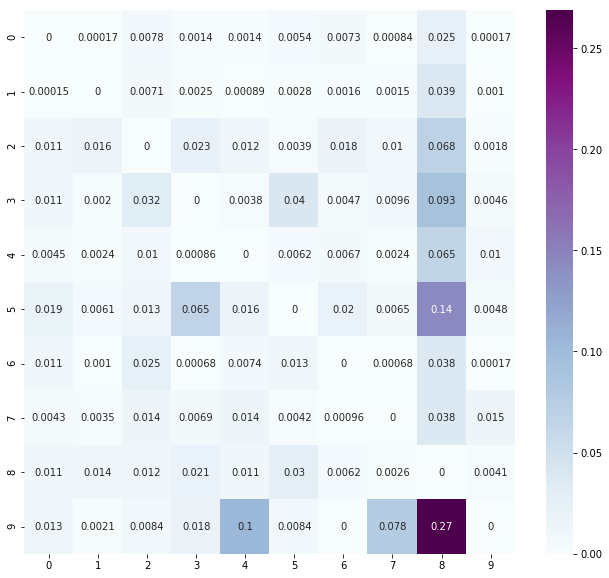

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

In [30]:
from sklearn.metrics import accuracy_score
y_pred=clf.predict(X_test)
accuracy_score=accuracy_score(y_pred,y_test)
accuracy=accuracy_score * 100
accuracy

60.060000000000002

# 3.3(c)

In [91]:
X_train, X_test, y_train, y_test = X[:55000], X[55000:], y[:55000], y[55000:]
shuffle_index = np.random.permutation(55000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [92]:
clf=svm.LinearSVC(C=0.5, max_iter=50)

In [93]:
clf.fit(X_train,y_train)

LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=50,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [94]:
y_pred=(X_test)

In [95]:
from sklearn.metrics import accuracy_score
y_pred=clf.predict(X_test)
accuracy_score=accuracy_score(y_pred,y_test)
accuracy=accuracy_score * 100
accuracy

69.913333333333341

In [96]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.87534082,  0.87355444,  0.87861429])

In [97]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5625,    0,   22,   32,   10,   39,   86,   13,   95,    1],
       [   1, 6548,   34,   13,   11,   18,   19,   15,   79,    4],
       [  72,  105, 4870,  129,   80,   37,  183,   68,  401,   13],
       [  26,   41,  159, 5251,   18,  156,   55,   92,  309,   24],
       [  25,   30,   48,   26, 5340,   25,   89,   53,  127,   79],
       [  69,   30,   46,  372,   70, 4100,  232,   36,  431,   35],
       [  34,   13,   41,    4,   36,   68, 5665,    5,   50,    2],
       [  24,   34,   58,   42,   60,   24,    7, 5798,  101,  117],
       [  52,  198,   79,  239,   65,  286,   90,   44, 4750,   48],
       [   7,    5,    7,   38,   99,   13,    1,  228,  123,  428]], dtype=int64)

In [98]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

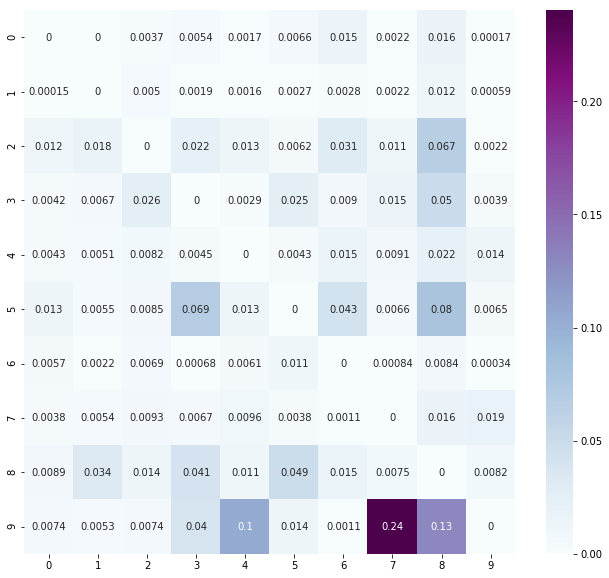

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

# 3.4(a) Decision Tree Classifier

In [100]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [101]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=42)

In [102]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [103]:
y_pred=dtc.predict(X_test)

In [104]:
from sklearn.model_selection import cross_val_score
cross_val_score(dtc, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.85557888,  0.85739287,  0.86362954])

In [105]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(dtc, X_train, y_train, cv=3)
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5416,    7,   51,   60,   37,  105,  109,   23,   76,   39],
       [   3, 6387,   82,   49,   30,   30,   26,   30,   87,   18],
       [  92,   91, 4931,  185,  121,   59,   88,  138,  172,   81],
       [  49,   71,  179, 5034,   51,  277,   48,  109,  204,  109],
       [  36,   41,   88,   36, 4994,   70,   89,   81,   95,  312],
       [  83,   65,   57,  263,   78, 4416,  145,   34,  158,  122],
       [  76,   38,   86,   45,  101,  161, 5231,   11,  133,   36],
       [  24,   39,  144,   90,   86,   38,   10, 5618,   47,  169],
       [  78,  110,  177,  225,  145,  181,   94,   86, 4572,  183],
       [  42,   27,   69,  121,  278,  125,   26,  187,  141, 4933]], dtype=int64)

In [106]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

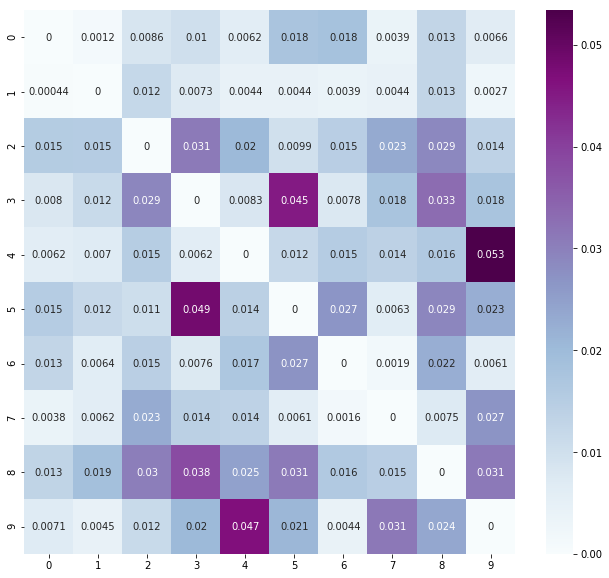

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

In [108]:
from sklearn.metrics import accuracy_score
y_pred=dtc.predict(X_test)
accuracy_score=accuracy_score(y_pred,y_test)
accuracy=accuracy_score * 100
accuracy

87.549999999999997

# 3.4(b) 

In [109]:
X_train, X_test, y_train, y_test = X[:55000], X[55000:], y[:55000], y[55000:]

In [110]:
dtc=DecisionTreeClassifier(random_state=42, min_samples_split=5, max_depth=35, criterion='entropy')

In [111]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=35,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [112]:
y_pred=dtc.predict(X_test)

In [113]:
from sklearn.model_selection import cross_val_score
cross_val_score(dtc, X_train, y_train, cv=3, scoring="accuracy")


array([ 0.87550442,  0.87349989,  0.87386798])

In [114]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(dtc, X_train, y_train, cv=3)
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5538,    5,   69,   40,   30,   72,   72,   22,   70,    5],
       [   1, 6474,   56,   38,   32,   28,   25,   36,   52,    0],
       [  84,   71, 5018,  169,   88,   58,  128,  155,  174,   13],
       [  53,   51,  197, 5173,   50,  275,   34,   88,  174,   36],
       [  39,   39,   73,   55, 5105,   84,  105,   94,  113,  135],
       [ 113,   56,   58,  274,   74, 4497,  119,   40,  155,   35],
       [  75,   41,  131,   30,   81,  140, 5280,   12,  121,    7],
       [  20,   53,  154,   72,  115,   27,   11, 5698,   70,   45],
       [  71,  114,  184,  175,  151,  158,  130,   52, 4745,   71],
       [  15,    8,   22,   52,  171,   25,    6,   51,   41,  558]], dtype=int64)

In [115]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

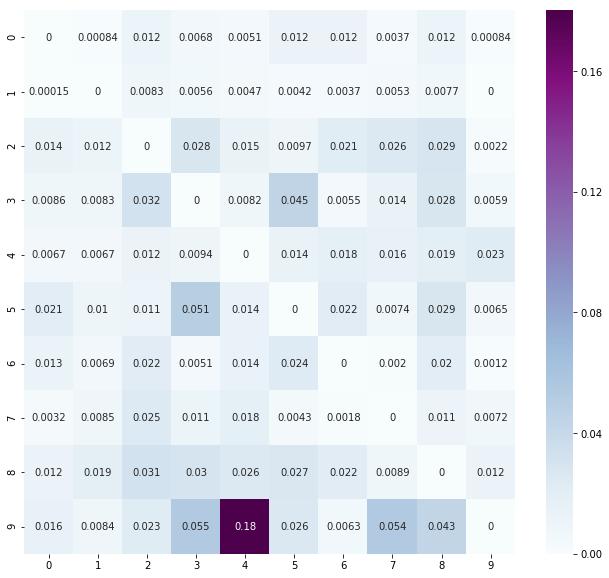

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

In [117]:
from sklearn.metrics import accuracy_score
y_pred=dtc.predict(X_test)
accuracy_score=accuracy_score(y_pred,y_test)
accuracy=accuracy_score * 100
accuracy

78.846666666666664

# 3.4(c)

In [118]:
X_train, X_test, y_train, y_test = X[:65000], X[65000:], y[:65000], y[65000:]

In [119]:
dtc=DecisionTreeClassifier(random_state=42, min_samples_split=15, max_depth=15, min_samples_leaf=10)

In [120]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=15,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [121]:
y_pred=dtc.predict(X_test)

In [122]:
from sklearn.model_selection import cross_val_score
cross_val_score(dtc, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.85754499,  0.85982646,  0.86627585])

In [123]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(dtc, X_train, y_train, cv=3)
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

array([[6392,    9,   66,   59,   19,  103,  112,   33,   86,   24],
       [   5, 7526,   86,   61,   31,   40,   27,   46,   42,   13],
       [ 106,   81, 5892,  153,  123,   58,  135,  161,  208,   73],
       [  59,   76,  242, 5926,   65,  283,   59,  105,  218,  108],
       [  46,   47,  103,   35, 5783,   60,   89,   79,  123,  320],
       [ 118,   80,   89,  302,   88, 4346,  115,   41,  153,   89],
       [ 107,   46,  143,   44,  126,  133, 5169,   13,  105,   32],
       [  31,   45,  149,   62,  121,   34,   15, 5584,   70,  154],
       [  63,  174,  236,  205,  134,  151,  128,   46, 4479,  235],
       [  59,   39,   64,  136,  335,  115,   27,  151,  141, 4882]], dtype=int64)

In [124]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

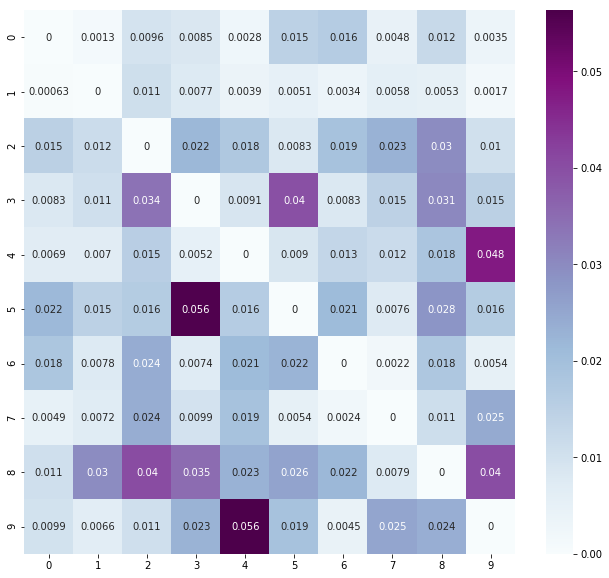

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

In [126]:
from sklearn.metrics import accuracy_score
y_pred=dtc.predict(X_test)
accuracy_score=accuracy_score(y_pred,y_test)
accuracy=accuracy_score * 100
accuracy

84.140000000000001

# 3.5(a) K nearest Neighbor

In [57]:
X_train, X_test, y_train, y_test = X[:55000], X[55000:], y[:55000], y[55000:]

In [58]:
shuffle_index = np.random.permutation(55000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [60]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [61]:
predictions1 = knn.predict(X_test)

In [62]:
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, predictions1)
conf_matrix

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,    8,  991,    2,    1,    0,    1,   15,    3,    0],
       [   0,    3,    2,  978,    1,   14,    1,    7,    4,    0],
       [   3,    6,    1,    0,  959,    0,    4,    2,    1,    6],
       [   5,    0,    0,   11,    2,  866,    4,    1,    2,    1],
       [   5,    3,    0,    0,    3,    2,  945,    0,    0,    0],
       [   0,   22,    5,    0,    3,    0,    0,  997,    0,    1],
       [   8,    3,    5,   13,    8,   11,    6,    5,  913,    2],
       [  31,   41,   20,   84,  476,   31,   11,  485,   29, 4801]], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions1)

0.90380000000000005

In [64]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = conf_matrix / row_sums

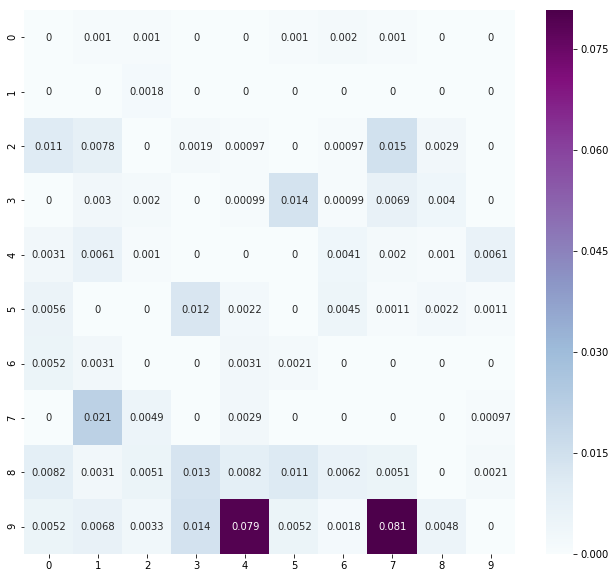

In [66]:
import seaborn as sns
ax = plt.subplots(figsize=(11, 10))
np.fill_diagonal(norm_conf_mx, 0)
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

# 3.5(b) 

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [13]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='kd_tree', leaf_size=15)

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=15, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [15]:
predictions1 = knn.predict(X_test)

In [16]:
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, predictions1)
conf_matrix

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [   9,    7,  997,    2,    0,    0,    1,   14,    2,    0],
       [   0,    2,    4,  978,    1,   13,    1,    7,    4,    0],
       [   0,    5,    0,    0,  965,    0,    5,    3,    0,    4],
       [   4,    1,    0,   13,    2,  862,    5,    1,    3,    1],
       [   4,    3,    0,    0,    4,    3,  944,    0,    0,    0],
       [   0,   18,    5,    0,    3,    0,    0, 1000,    0,    2],
       [   7,    0,    3,   13,    6,   11,    3,    5,  925,    1],
       [   9,    7,    5,   11,   48,    4,    1,   57,    5,  862]], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions1)

0.96399999999999997

In [18]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = conf_matrix / row_sums

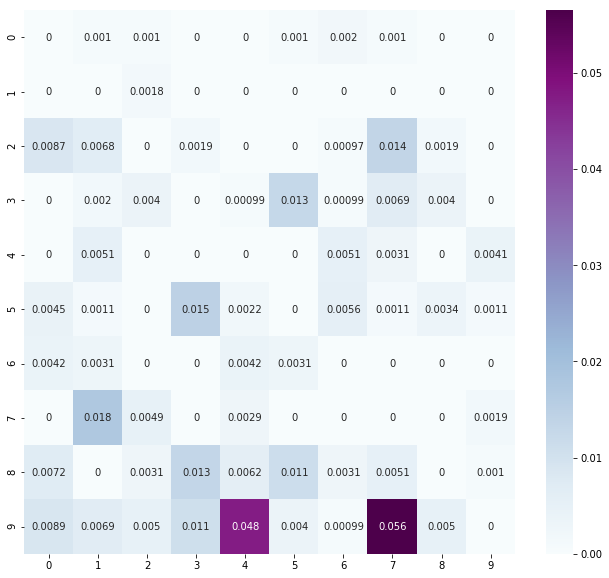

In [19]:
import seaborn as sns
ax = plt.subplots(figsize=(11, 10))
np.fill_diagonal(norm_conf_mx, 0)
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn, X_train, y_train, cv=3, scoring="accuracy")

# 3.5(c)

In [20]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [21]:
knn = KNeighborsClassifier(n_neighbors=7, algorithm='kd_tree', leaf_size=40)

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=40, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [23]:
predictions1 = knn.predict(X_test)

In [24]:
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, predictions1)
conf_matrix

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,    8,  988,    2,    1,    0,    2,   16,    4,    0],
       [   0,    3,    2,  976,    1,   13,    1,    8,    5,    1],
       [   1,    8,    1,    0,  960,    0,    5,    1,    1,    5],
       [   5,    0,    0,    7,    2,  871,    4,    1,    2,    0],
       [   6,    3,    0,    0,    3,    2,  944,    0,    0,    0],
       [   0,   24,    3,    0,    1,    0,    0,  999,    0,    1],
       [   6,    4,    6,   11,    7,   13,    1,    6,  918,    2],
       [  12,    8,    2,   15,   68,    4,    1,   74,    5,  820]], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions1)

0.95830000000000004

In [26]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = conf_matrix / row_sums

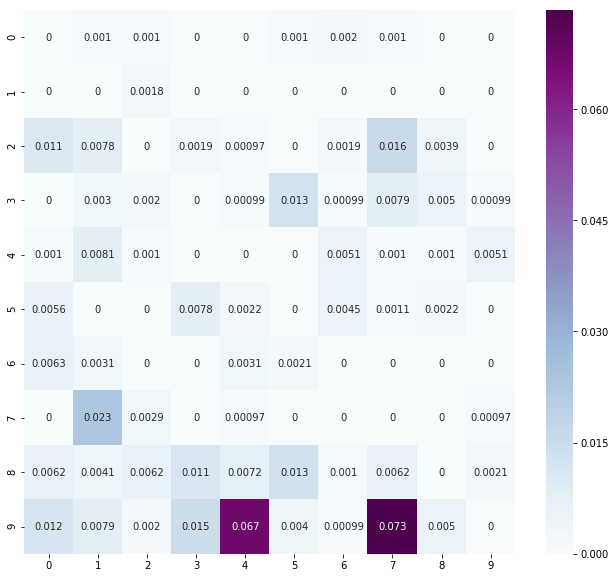

In [27]:
import seaborn as sns
ax = plt.subplots(figsize=(11, 10))
np.fill_diagonal(norm_conf_mx, 0)
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn, X_train, y_train, cv=3, scoring="accuracy")

# 3.5(d)

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10, leaf_size=75)

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=75, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [16]:
predictions1 = knn.predict(X_test)

In [17]:
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, predictions1)
conf_matrix

array([[ 972,    1,    1,    0,    0,    2,    3,    1,    0,    0],
       [   0, 1132,    2,    0,    0,    0,    1,    0,    0,    0],
       [  13,   12,  982,    2,    1,    0,    2,   17,    3,    0],
       [   0,    3,    3,  976,    1,   10,    1,    7,    6,    3],
       [   2,   11,    0,    0,  940,    0,    4,    1,    1,   23],
       [   4,    0,    0,   12,    1,  863,    6,    1,    1,    4],
       [   6,    4,    0,    0,    3,    2,  943,    0,    0,    0],
       [   0,   27,    4,    0,    2,    0,    0,  983,    0,   12],
       [   6,    4,    5,   11,    7,    9,    4,    7,  914,    7],
       [   7,    6,    3,    7,   10,    3,    1,   10,    2,  960]], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions1)

0.96650000000000003

In [19]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = conf_matrix / row_sums

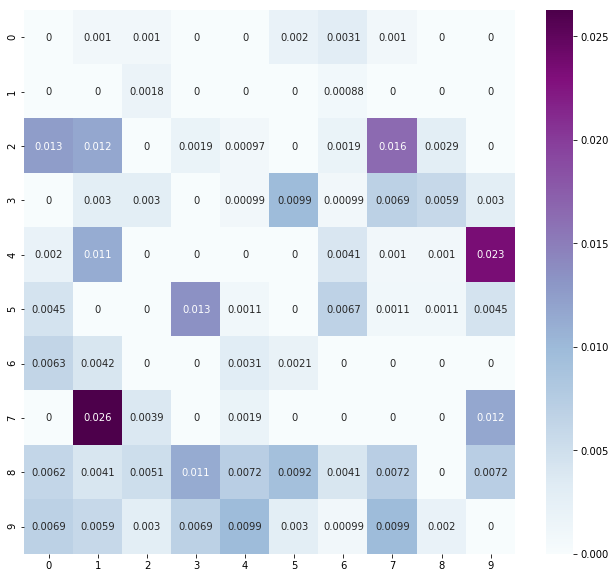

In [20]:
import seaborn as sns
ax = plt.subplots(figsize=(11, 10))
np.fill_diagonal(norm_conf_mx, 0)
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

# 3.5(e)

In [9]:
X_train, X_test, y_train, y_test = X[:55000], X[55000:], y[:55000], y[55000:]


In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, leaf_size=25, algorithm='ball_tree')

In [11]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=25, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
predictions1 = knn.predict(X_test)

In [13]:
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, predictions1)
conf_matrix

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,    8,  991,    2,    1,    0,    1,   15,    3,    0],
       [   0,    3,    2,  978,    1,   14,    1,    7,    4,    0],
       [   3,    6,    1,    0,  959,    0,    4,    2,    1,    6],
       [   5,    0,    0,   11,    2,  866,    4,    1,    2,    1],
       [   5,    3,    0,    0,    3,    2,  945,    0,    0,    0],
       [   0,   22,    5,    0,    3,    0,    0,  997,    0,    1],
       [   8,    3,    5,   13,    8,   11,    6,    5,  913,    2],
       [  31,   41,   20,   84,  476,   31,   11,  485,   29, 4801]], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions1)

0.90380000000000005

In [15]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = conf_matrix / row_sums

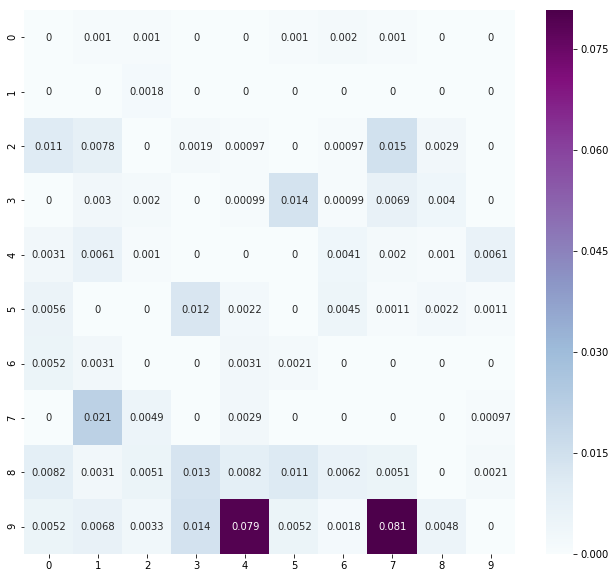

In [16]:
import seaborn as sns
ax = plt.subplots(figsize=(11, 10))
np.fill_diagonal(norm_conf_mx, 0)
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

# Radial Basis Function(RBF) using TensorFlow

# 1) 3.6 extra

In [1]:
import numpy as np
import tensorflow as tf

def get_input_fn(dataset_split, batch_size, capacity=10000, min_after_dequeue=3000):
    def _input_fn():
        images_batch, labels_batch = tf.train.shuffle_batch(
            tensors=[dataset_split.images, dataset_split.labels.astype(np.int32)],
            batch_size=batch_size,
            capacity=capacity,
            min_after_dequeue=min_after_dequeue,
            enqueue_many=True,
            num_threads=4)
        features_map = {'images': images_batch}
        return features_map, labels_batch

    return _input_fn

data = tf.contrib.learn.datasets.mnist.load_mnist()

train_input_fn = get_input_fn(data.train, batch_size=256)
eval_input_fn = get_input_fn(data.validation, batch_size=5000)


Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


In [2]:
image_column = tf.contrib.layers.real_valued_column('images', dimension=784)

In [3]:
import time
image_column = tf.contrib.layers.real_valued_column('images', dimension=784)
optimizer = tf.train.FtrlOptimizer(
   learning_rate=50.0, l2_regularization_strength=0.001)

kernel_mapper = tf.contrib.kernel_methods.RandomFourierFeatureMapper(
  input_dim=784, output_dim=2000, stddev=5.0, name='rffm')
kernel_mappers = {image_column: [kernel_mapper]}
estimator = tf.contrib.kernel_methods.KernelLinearClassifier(
   n_classes=10, optimizer=optimizer, kernel_mappers=kernel_mappers)

# Train.
start = time.time()
estimator.fit(input_fn=train_input_fn, steps=2000)
end = time.time()
print('Elapsed time: {} seconds'.format(end - start))

# Evaluate and report metrics.
eval_metrics = estimator.evaluate(input_fn=eval_input_fn, steps=1)
print(eval_metrics)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001C454D1F160>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\kisho\\AppData\\Local\\Temp\\tmpdxdw4mq9'}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no lon

# Radial Basis Function(RBF) Using Sklearn

# 3.6(a)

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['patch.force_edgecolor'] = True
plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.linestyle'] = '-'
plt.rcParams['grid.linewidth'] = 0.5
sns.set_style('whitegrid')

In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
X_train.shape

(60000, 784)

In [9]:
from sklearn.svm import SVC 

In [10]:
RBF = SVC(max_iter = 500, gamma=0.005)

In [11]:
X_train =  X_train / 255
X_test = X_test / 255

In [12]:
RBF.fit(X_train, y_train)

C:\Users\kisho\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=500, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
pred = RBF.predict(X_test)

In [14]:
from sklearn import metrics 

In [15]:
conf_matrix = metrics.confusion_matrix(y_test, pred)
conf_matrix

array([[ 970,    0,    2,    0,    0,    4,    1,    1,    2,    0],
       [   0, 1125,    2,    1,    0,    1,    3,    0,    2,    1],
       [   5,    1,  991,    5,    4,    0,    2,    8,   14,    2],
       [   0,    0,    5,  979,    0,    8,    0,    5,    9,    4],
       [   1,    0,    6,    0,  934,    0,    2,    1,    2,   36],
       [   5,    1,    2,   12,    2,  853,    5,    1,    9,    2],
       [   9,    2,    2,    0,    2,    4,  935,    0,    4,    0],
       [   1,    9,   18,    3,    6,    0,    0,  949,    3,   39],
       [   3,    0,    3,    8,    6,    5,    3,    5,  938,    3],
       [   4,    6,    2,    8,   12,    3,    1,    0,    4,  969]], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,  pred)

0.96430000000000005

In [17]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = conf_matrix / row_sums

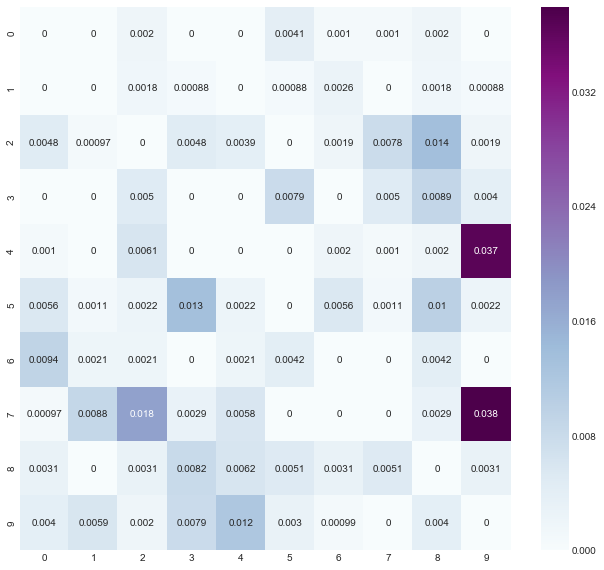

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")


# 3.6(b)

In [5]:
X_train, X_test, y_train, y_test = X[:55000], X[55000:], y[:55000], y[55000:]

In [6]:
shuffle_index = np.random.permutation(55000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
X_train.shape

(55000, 784)

In [7]:
from sklearn.svm import SVC 

In [8]:
RBF = SVC(max_iter = 650, gamma=0.005)

In [9]:
X_train =  X_train / 255
X_test = X_test / 255

In [10]:
RBF.fit(X_train, y_train)

C:\Users\kisho\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=650).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=650, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
pred = RBF.predict(X_test)

In [12]:
from sklearn import metrics 

In [13]:
conf_matrix = metrics.confusion_matrix(y_test, pred)
conf_matrix

array([[ 970,    0,    2,    0,    0,    4,    2,    1,    1,    0],
       [   0, 1124,    3,    1,    0,    1,    3,    1,    2,    0],
       [   6,    1,  992,    5,    5,    0,    3,    9,   11,    0],
       [   0,    0,    6,  978,    0,    7,    0,   10,    9,    0],
       [   1,    1,    6,    0,  965,    0,    2,    2,    2,    3],
       [   5,    2,    1,   10,    3,  855,    7,    1,    7,    1],
       [   9,    2,    2,    0,    2,    5,  935,    0,    3,    0],
       [   0,    8,   19,    3,    4,    0,    0,  991,    2,    1],
       [   3,    0,    3,    7,    7,    9,    3,    6,  936,    0],
       [  37,   38,   55,  114,  518,   61,    3,  414,   68, 4701]], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,  pred)

0.89646666666666663

In [15]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = conf_matrix / row_sums

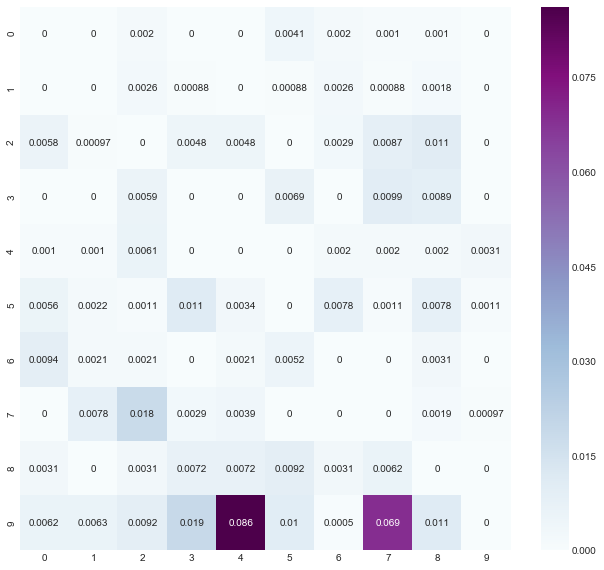

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

# 3.6(c)

In [22]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [23]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
X_train.shape

(60000, 784)

In [24]:
from sklearn.svm import SVC 

In [25]:
RBF = SVC(max_iter = 350, gamma=0.005)

In [26]:
X_train =  X_train / 255
X_test = X_test / 255

In [27]:
RBF.fit(X_train, y_train)

C:\Users\kisho\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=350).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=350, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
pred = RBF.predict(X_test)

In [29]:
from sklearn import metrics 

In [30]:
conf_matrix = metrics.confusion_matrix(y_test, pred)
conf_matrix

array([[ 970,    0,    2,    0,    0,    4,    1,    0,    2,    1],
       [   0, 1126,    2,    1,    0,    1,    3,    1,    1,    0],
       [   5,    1,  990,    6,    4,    0,    3,    8,   13,    2],
       [   0,    1,    3,  950,    0,   29,    0,    5,   16,    6],
       [   1,    0,    6,    0,  904,    0,    2,    0,    2,   67],
       [   6,    1,    0,    8,    2,  856,    7,    1,    9,    2],
       [   9,    2,    1,    0,    2,    7,  934,    0,    3,    0],
       [   1,   10,   19,    4,    7,    0,    0,  921,    2,   64],
       [   4,    1,    2,    5,    5,    5,    5,    5,  937,    5],
       [   4,    6,    2,    7,   10,    3,    1,    1,    4,  971]], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,  pred)

0.95589999999999997

In [32]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = conf_matrix / row_sums

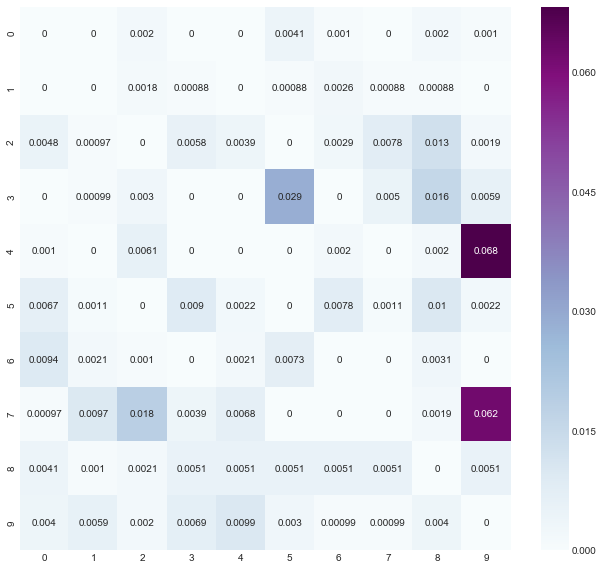

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

# 3.7(a) One hidden layer neural network

In [18]:
from sklearn.neural_network import MLPClassifier

In [65]:

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [66]:
mlp=MLPClassifier(hidden_layer_sizes=10, verbose=True, activation="relu")

In [67]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 2.68247646
Iteration 2, loss = 1.96616854
Iteration 3, loss = 1.82618911
Iteration 4, loss = 1.70146642
Iteration 5, loss = 1.61908395
Iteration 6, loss = 1.47303609
Iteration 7, loss = 1.34908238
Iteration 8, loss = 1.18693637
Iteration 9, loss = 1.04126508
Iteration 10, loss = 0.90620623
Iteration 11, loss = 0.84840486
Iteration 12, loss = 0.79983276
Iteration 13, loss = 0.75087154
Iteration 14, loss = 0.69899661
Iteration 15, loss = 0.66136836
Iteration 16, loss = 0.64751394
Iteration 17, loss = 0.62808460
Iteration 18, loss = 0.62110720
Iteration 19, loss = 0.60282699
Iteration 20, loss = 0.59010640
Iteration 21, loss = 0.56933436
Iteration 22, loss = 0.54487164
Iteration 23, loss = 0.52134884
Iteration 24, loss = 0.50308595
Iteration 25, loss = 0.48397283
Iteration 26, loss = 0.46736214
Iteration 27, loss = 0.45718780
Iteration 28, loss = 0.45070091
Iteration 29, loss = 0.44016016
Iteration 30, loss = 0.43883013
Iteration 31, loss = 0.42770362
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [68]:
y_pred=mlp.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy_score(y_pred, y_test)

0.88880000000000003

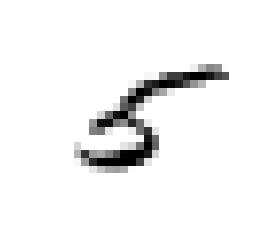

In [45]:

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X_test[6000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [71]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X_train, y_train, cv=3, scoring="accuracy")

Iteration 1, loss = 3.02067938
Iteration 2, loss = 1.90011348
Iteration 3, loss = 1.65257491
Iteration 4, loss = 1.58615703
Iteration 5, loss = 1.53663141
Iteration 6, loss = 1.49946315
Iteration 7, loss = 1.46178751
Iteration 8, loss = 1.43640308
Iteration 9, loss = 1.42495247
Iteration 10, loss = 1.41010351
Iteration 11, loss = 1.38843245
Iteration 12, loss = 1.37459579
Iteration 13, loss = 1.35438653
Iteration 14, loss = 1.32409767
Iteration 15, loss = 1.30357281
Iteration 16, loss = 1.27012797
Iteration 17, loss = 1.22003251
Iteration 18, loss = 1.14041692
Iteration 19, loss = 1.09227466
Iteration 20, loss = 1.05244695
Iteration 21, loss = 1.00220942
Iteration 22, loss = 0.88836347
Iteration 23, loss = 0.78584965
Iteration 24, loss = 0.72453913
Iteration 25, loss = 0.69637920
Iteration 26, loss = 0.67925621
Iteration 27, loss = 0.65297134
Iteration 28, loss = 0.64071423
Iteration 29, loss = 0.62411391
Iteration 30, loss = 0.60992196
Iteration 31, loss = 0.59198994
Iteration 32, los

array([ 0.84733053,  0.89504475,  0.83032455])

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(mlp, X_train, y_train, cv=3)
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

Iteration 1, loss = 3.29682847
Iteration 2, loss = 2.10791384
Iteration 3, loss = 2.00063709
Iteration 4, loss = 1.91421352
Iteration 5, loss = 1.85654229
Iteration 6, loss = 1.81621574
Iteration 7, loss = 1.78319463
Iteration 8, loss = 1.74314257
Iteration 9, loss = 1.63688199
Iteration 10, loss = 1.46717496
Iteration 11, loss = 1.35919805
Iteration 12, loss = 1.26763451
Iteration 13, loss = 1.15541968
Iteration 14, loss = 1.07336466
Iteration 15, loss = 0.99936595
Iteration 16, loss = 0.93674762
Iteration 17, loss = 0.88751841
Iteration 18, loss = 0.85581357
Iteration 19, loss = 0.82346074
Iteration 20, loss = 0.80074102
Iteration 21, loss = 0.78341017
Iteration 22, loss = 0.76185925
Iteration 23, loss = 0.72002086
Iteration 24, loss = 0.69840908
Iteration 25, loss = 0.66852833
Iteration 26, loss = 0.64345009
Iteration 27, loss = 0.62732361
Iteration 28, loss = 0.61460743
Iteration 29, loss = 0.60254445
Iteration 30, loss = 0.59725324
Iteration 31, loss = 0.58395269
Iteration 32, los

array([[5397,    1,   25,   26,   14,  208,  161,    3,   69,   19],
       [   0, 5987,   63,  114,   19,   33,   10,   15,  483,   18],
       [  57,   48, 4805,  401,   69,   33,  270,   58,  180,   37],
       [  28,   81,  275, 4767,    8,  472,   71,   64,  298,   67],
       [ 100,   28,   21,    9, 4716,   55,  152,  105,   62,  594],
       [ 312,   16,   37,  326,   54, 4204,  132,    5,  249,   86],
       [ 208,   26,   78,   54,   43,   96, 5356,    6,   18,   33],
       [  22,   68,   42,  152,  201,   22,    4, 5462,   50,  242],
       [ 193,  277,  148,  424,   79,  461,  109,   28, 3955,  177],
       [  42,   27,    4,   54,  379,   78,   10,  289,  149, 4917]], dtype=int64)

In [73]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

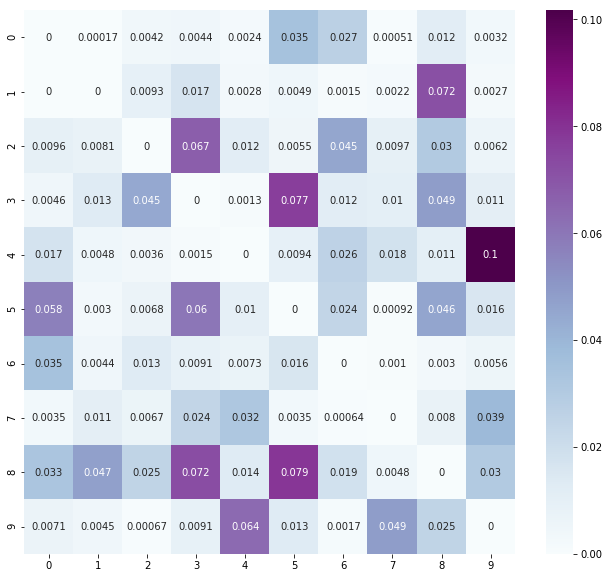

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

# 3.7(b)

In [115]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
mlp=MLPClassifier(hidden_layer_sizes=30, verbose=True, activation="relu",learning_rate_init=0.0001)

In [116]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 9.92027895
Iteration 2, loss = 2.89831047
Iteration 3, loss = 2.22462291
Iteration 4, loss = 1.99664358
Iteration 5, loss = 1.83626298
Iteration 6, loss = 1.69824855
Iteration 7, loss = 1.57858036
Iteration 8, loss = 1.47641620
Iteration 9, loss = 1.38216514
Iteration 10, loss = 1.29382119
Iteration 11, loss = 1.21698179
Iteration 12, loss = 1.15345484
Iteration 13, loss = 1.10074049
Iteration 14, loss = 1.05373124
Iteration 15, loss = 1.00979656
Iteration 16, loss = 0.96352010
Iteration 17, loss = 0.91768267
Iteration 18, loss = 0.86758455
Iteration 19, loss = 0.81544959
Iteration 20, loss = 0.77487601
Iteration 21, loss = 0.74160576
Iteration 22, loss = 0.71207662
Iteration 23, loss = 0.67976837
Iteration 24, loss = 0.65426530
Iteration 25, loss = 0.63018334
Iteration 26, loss = 0.60791898
Iteration 27, loss = 0.58712995
Iteration 28, loss = 0.56953177
Iteration 29, loss = 0.55345600
Iteration 30, loss = 0.53796629
Iteration 31, loss = 0.52381893
Iteration 32, los

c:\users\vrish\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=30, learning_rate='constant',
       learning_rate_init=0.0001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [117]:
y_pred=mlp.predict(X_test)

In [118]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.94189999999999996

In [120]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X_train, y_train, cv=3, scoring="accuracy")

Iteration 1, loss = 12.80231727
Iteration 2, loss = 5.96150635
Iteration 3, loss = 3.60594541
Iteration 4, loss = 2.37206494
Iteration 5, loss = 1.99227770
Iteration 6, loss = 1.80915227
Iteration 7, loss = 1.67425460
Iteration 8, loss = 1.56706880
Iteration 9, loss = 1.47450163
Iteration 10, loss = 1.39488721
Iteration 11, loss = 1.31994029
Iteration 12, loss = 1.25070975
Iteration 13, loss = 1.18802811
Iteration 14, loss = 1.13028374
Iteration 15, loss = 1.08011047
Iteration 16, loss = 1.02339749
Iteration 17, loss = 0.96533655
Iteration 18, loss = 0.91103367
Iteration 19, loss = 0.86586937
Iteration 20, loss = 0.82770273
Iteration 21, loss = 0.78972839
Iteration 22, loss = 0.75441594
Iteration 23, loss = 0.71962398
Iteration 24, loss = 0.68762537
Iteration 25, loss = 0.65697799
Iteration 26, loss = 0.62743286
Iteration 27, loss = 0.60111427
Iteration 28, loss = 0.57956469
Iteration 29, loss = 0.55907549
Iteration 30, loss = 0.53814716
Iteration 31, loss = 0.52076041
Iteration 32, lo

c:\users\vrish\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 11.47133073
Iteration 2, loss = 5.22512491
Iteration 3, loss = 2.93283657
Iteration 4, loss = 2.15704565
Iteration 5, loss = 1.84654858
Iteration 6, loss = 1.66949513
Iteration 7, loss = 1.55661741
Iteration 8, loss = 1.45157905
Iteration 9, loss = 1.36168429
Iteration 10, loss = 1.28289695
Iteration 11, loss = 1.21371660
Iteration 12, loss = 1.14954483
Iteration 13, loss = 1.09447104
Iteration 14, loss = 1.04389941
Iteration 15, loss = 1.00092470
Iteration 16, loss = 0.96266798
Iteration 17, loss = 0.92744778
Iteration 18, loss = 0.89250920
Iteration 19, loss = 0.85691570
Iteration 20, loss = 0.82439527
Iteration 21, loss = 0.79467653
Iteration 22, loss = 0.76957690
Iteration 23, loss = 0.73909576
Iteration 24, loss = 0.71846556
Iteration 25, loss = 0.69451127
Iteration 26, loss = 0.67353496
Iteration 27, loss = 0.65319175
Iteration 28, loss = 0.63115538
Iteration 29, loss = 0.61201939
Iteration 30, loss = 0.59569172
Iteration 31, loss = 0.57558316
Iteration 32, lo

Iteration 80, loss = 0.24613145
Iteration 81, loss = 0.24203826
Iteration 82, loss = 0.24336032
Iteration 83, loss = 0.23631168
Iteration 84, loss = 0.23483955
Iteration 85, loss = 0.23180129
Iteration 86, loss = 0.22927599
Iteration 87, loss = 0.22674846
Iteration 88, loss = 0.22617036
Iteration 89, loss = 0.22262228
Iteration 90, loss = 0.21965156
Iteration 91, loss = 0.21689362
Iteration 92, loss = 0.21439450
Iteration 93, loss = 0.21381977
Iteration 94, loss = 0.21157872
Iteration 95, loss = 0.21005515
Iteration 96, loss = 0.20642656
Iteration 97, loss = 0.20422794
Iteration 98, loss = 0.20313504
Iteration 99, loss = 0.20216007
Iteration 100, loss = 0.20015191
Iteration 101, loss = 0.19776265
Iteration 102, loss = 0.19526314
Iteration 103, loss = 0.19356436
Iteration 104, loss = 0.19312028
Iteration 105, loss = 0.19037971
Iteration 106, loss = 0.18906340
Iteration 107, loss = 0.18607989
Iteration 108, loss = 0.18405584
Iteration 109, loss = 0.18266062
Iteration 110, loss = 0.180738

c:\users\vrish\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([ 0.92486503,  0.920096  ,  0.92203831])

In [121]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(mlp, X_train, y_train, cv=3)
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

Iteration 1, loss = 13.40897889
Iteration 2, loss = 6.51328042
Iteration 3, loss = 4.05896432
Iteration 4, loss = 2.39192396
Iteration 5, loss = 1.90402292
Iteration 6, loss = 1.71727958
Iteration 7, loss = 1.59712934
Iteration 8, loss = 1.49989587
Iteration 9, loss = 1.41642921
Iteration 10, loss = 1.33858735
Iteration 11, loss = 1.27352183
Iteration 12, loss = 1.21555871
Iteration 13, loss = 1.16486021
Iteration 14, loss = 1.11575269
Iteration 15, loss = 1.06935537
Iteration 16, loss = 1.02896225
Iteration 17, loss = 0.98595697
Iteration 18, loss = 0.95280925
Iteration 19, loss = 0.91746892
Iteration 20, loss = 0.88410240
Iteration 21, loss = 0.85086653
Iteration 22, loss = 0.82053700
Iteration 23, loss = 0.79192718
Iteration 24, loss = 0.76788708
Iteration 25, loss = 0.74408796
Iteration 26, loss = 0.71911498
Iteration 27, loss = 0.70034317
Iteration 28, loss = 0.68170996
Iteration 29, loss = 0.66426483
Iteration 30, loss = 0.64786324
Iteration 31, loss = 0.62903972
Iteration 32, lo

c:\users\vrish\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 12.67552702
Iteration 2, loss = 5.84457120
Iteration 3, loss = 3.40624204
Iteration 4, loss = 2.32081970
Iteration 5, loss = 1.92698366
Iteration 6, loss = 1.73113492
Iteration 7, loss = 1.60472994
Iteration 8, loss = 1.50149875
Iteration 9, loss = 1.40819385
Iteration 10, loss = 1.32653971
Iteration 11, loss = 1.25506717
Iteration 12, loss = 1.19237300
Iteration 13, loss = 1.13523777
Iteration 14, loss = 1.08997458
Iteration 15, loss = 1.04414039
Iteration 16, loss = 1.00243995
Iteration 17, loss = 0.96114546
Iteration 18, loss = 0.92613237
Iteration 19, loss = 0.89266801
Iteration 20, loss = 0.86086710
Iteration 21, loss = 0.82927216
Iteration 22, loss = 0.80081524
Iteration 23, loss = 0.77257069
Iteration 24, loss = 0.74592970
Iteration 25, loss = 0.72112377
Iteration 26, loss = 0.69886830
Iteration 27, loss = 0.67618583
Iteration 28, loss = 0.65285310
Iteration 29, loss = 0.63317949
Iteration 30, loss = 0.61375387
Iteration 31, loss = 0.60153143
Iteration 32, lo

Iteration 76, loss = 0.27682525
Iteration 77, loss = 0.27329333
Iteration 78, loss = 0.27198676
Iteration 79, loss = 0.26880841
Iteration 80, loss = 0.26551019
Iteration 81, loss = 0.26303379
Iteration 82, loss = 0.25999379
Iteration 83, loss = 0.25769935
Iteration 84, loss = 0.25587770
Iteration 85, loss = 0.25359634
Iteration 86, loss = 0.25138191
Iteration 87, loss = 0.25179755
Iteration 88, loss = 0.24662090
Iteration 89, loss = 0.24309869
Iteration 90, loss = 0.24412985
Iteration 91, loss = 0.24216180
Iteration 92, loss = 0.23891232
Iteration 93, loss = 0.23643915
Iteration 94, loss = 0.23556568
Iteration 95, loss = 0.23255120
Iteration 96, loss = 0.22988876
Iteration 97, loss = 0.22914654
Iteration 98, loss = 0.22588473
Iteration 99, loss = 0.22414745
Iteration 100, loss = 0.22370316
Iteration 101, loss = 0.22117851
Iteration 102, loss = 0.22002125
Iteration 103, loss = 0.21870439
Iteration 104, loss = 0.21660406
Iteration 105, loss = 0.21530039
Iteration 106, loss = 0.21374264
I

array([[5653,    0,   19,    4,   12,   25,   40,    7,  153,   10],
       [   2, 6518,   58,   17,   12,   11,    4,   16,   98,    6],
       [  20,   36, 5447,   98,   56,   16,   50,   56,  163,   16],
       [  16,   19,  127, 5508,    8,  148,    1,   50,  194,   60],
       [   5,   13,   46,    4, 5381,   17,   37,   33,   76,  230],
       [  47,   12,   28,  162,   16, 4802,   96,   24,  188,   46],
       [  37,    9,   41,    2,   45,   64, 5623,    6,   90,    1],
       [  18,   28,   71,   56,   43,    8,    1, 5812,   45,  183],
       [  29,   50,   75,   83,   26,  101,   27,   25, 5367,   68],
       [  22,   14,    5,   76,  142,   41,    4,  123,  171, 5351]], dtype=int64)

In [122]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums


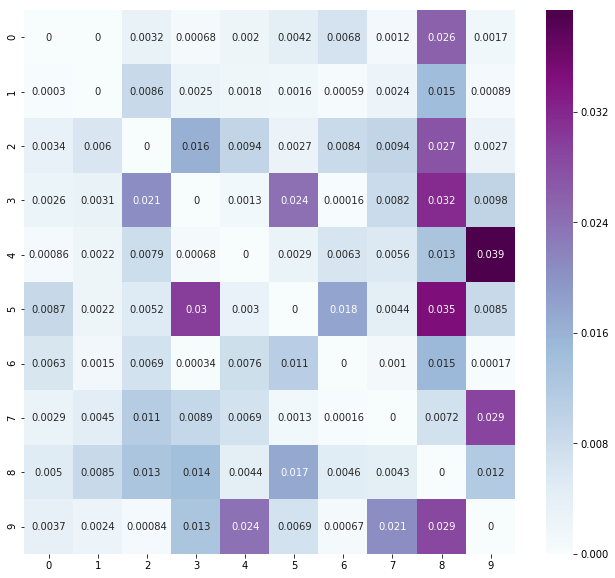

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

# 3.7(c)

In [139]:
X_train, X_test, y_train, y_test = X[:65000], X[65000:], y[:65000], y[65000:]
shuffle_index = np.random.permutation(65000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
mlp=MLPClassifier(hidden_layer_sizes=50, verbose=True, activation="relu",learning_rate_init=0.001, batch_size=250, learning_rate='adaptive')

In [140]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 3.19253945
Iteration 2, loss = 0.91212741
Iteration 3, loss = 0.69125768
Iteration 4, loss = 0.55405102
Iteration 5, loss = 0.47230306
Iteration 6, loss = 0.39952881
Iteration 7, loss = 0.35077080
Iteration 8, loss = 0.31363639
Iteration 9, loss = 0.28310477
Iteration 10, loss = 0.25588132
Iteration 11, loss = 0.24106396
Iteration 12, loss = 0.22160130
Iteration 13, loss = 0.21143834
Iteration 14, loss = 0.19417761
Iteration 15, loss = 0.18414326
Iteration 16, loss = 0.17875428
Iteration 17, loss = 0.17067983
Iteration 18, loss = 0.16387503
Iteration 19, loss = 0.16048303
Iteration 20, loss = 0.15222056
Iteration 21, loss = 0.15169077
Iteration 22, loss = 0.14889372
Iteration 23, loss = 0.13689831
Iteration 24, loss = 0.13778450
Iteration 25, loss = 0.13615041
Iteration 26, loss = 0.12981801
Iteration 27, loss = 0.13126346
Iteration 28, loss = 0.12582689
Iteration 29, loss = 0.12069228
Iteration 30, loss = 0.11813644
Iteration 31, loss = 0.11505614
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size=250, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [141]:
y_pred=mlp.predict(X_test)

In [142]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9476

In [143]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(mlp, X_train, y_train, cv=3)
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

Iteration 1, loss = 4.38561874
Iteration 2, loss = 1.57108906
Iteration 3, loss = 0.90567958
Iteration 4, loss = 0.67072074
Iteration 5, loss = 0.54576527
Iteration 6, loss = 0.47054840
Iteration 7, loss = 0.41400400
Iteration 8, loss = 0.36437000
Iteration 9, loss = 0.32651925
Iteration 10, loss = 0.29544603
Iteration 11, loss = 0.27377974
Iteration 12, loss = 0.25416567
Iteration 13, loss = 0.23822782
Iteration 14, loss = 0.21622561
Iteration 15, loss = 0.20372273
Iteration 16, loss = 0.20047107
Iteration 17, loss = 0.18642712
Iteration 18, loss = 0.17710752
Iteration 19, loss = 0.16192811
Iteration 20, loss = 0.16017125
Iteration 21, loss = 0.14747339
Iteration 22, loss = 0.14268966
Iteration 23, loss = 0.14596122
Iteration 24, loss = 0.13679871
Iteration 25, loss = 0.13048571
Iteration 26, loss = 0.13515621
Iteration 27, loss = 0.12981623
Iteration 28, loss = 0.12581649
Iteration 29, loss = 0.11882286
Iteration 30, loss = 0.11971791
Iteration 31, loss = 0.11606892
Iteration 32, los

array([[6681,    1,    6,    6,   22,   21,   55,   12,   89,   10],
       [   4, 7659,   35,   30,   19,   10,   22,   16,   65,   17],
       [  38,   25, 6417,  116,   49,   11,   55,   98,  165,   16],
       [  11,   12,   74, 6646,    9,  155,    7,   59,  124,   44],
       [  11,   13,   23,    3, 6362,    4,   45,   24,   38,  162],
       [  29,    7,   13,  128,   19, 5016,   75,    7,   77,   50],
       [  32,   14,    9,    1,   26,   56, 5714,    3,   63,    0],
       [   9,   21,   48,   32,   46,    3,    2, 5987,   15,  102],
       [  27,   32,   32,   74,   29,   71,   58,    9, 5450,   69],
       [  16,   13,    6,   82,  153,   40,    2,   83,   75, 5479]], dtype=int64)

In [144]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

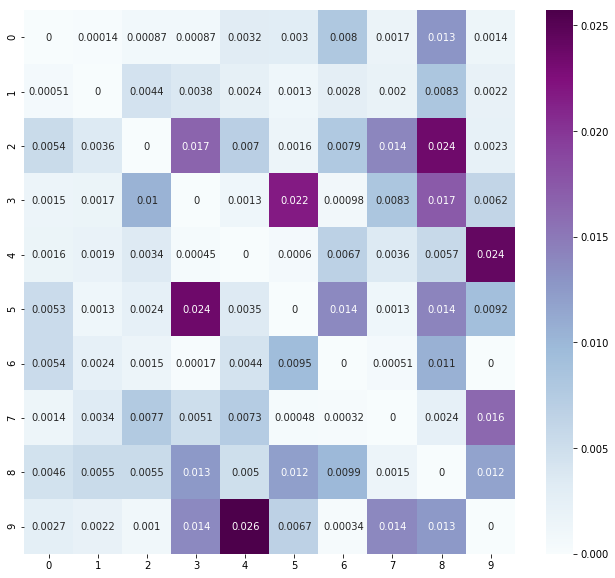

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

# 3.7 (d)

In [146]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
mlp=MLPClassifier(hidden_layer_sizes=20, verbose=True, activation="relu",learning_rate_init=0.001, batch_size=150, learning_rate='adaptive')

In [147]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 2.74784626
Iteration 2, loss = 1.28461999
Iteration 3, loss = 0.93617742
Iteration 4, loss = 0.77108214
Iteration 5, loss = 0.66741158
Iteration 6, loss = 0.61189759
Iteration 7, loss = 0.56111209
Iteration 8, loss = 0.51557828
Iteration 9, loss = 0.48522104
Iteration 10, loss = 0.44451753
Iteration 11, loss = 0.40061863
Iteration 12, loss = 0.36881158
Iteration 13, loss = 0.33993769
Iteration 14, loss = 0.31472954
Iteration 15, loss = 0.29962868
Iteration 16, loss = 0.29023954
Iteration 17, loss = 0.27992915
Iteration 18, loss = 0.27559788
Iteration 19, loss = 0.26453823
Iteration 20, loss = 0.26205145
Iteration 21, loss = 0.25753079
Iteration 22, loss = 0.25607827
Iteration 23, loss = 0.25091784
Iteration 24, loss = 0.24524782
Iteration 25, loss = 0.24461084
Iteration 26, loss = 0.24228238
Iteration 27, loss = 0.23732777
Iteration 28, loss = 0.23504730
Iteration 29, loss = 0.23725851
Iteration 30, loss = 0.23009160
Iteration 31, loss = 0.22942082
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size=150, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=20, learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [148]:
y_pred=mlp.predict(X_test)

In [149]:
accuracy_score(y_pred, y_test)

0.93120000000000003

In [150]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X_train, y_train, cv=3, scoring="accuracy")

Iteration 1, loss = 2.88585936
Iteration 2, loss = 1.49809281
Iteration 3, loss = 1.26497824
Iteration 4, loss = 1.08695027
Iteration 5, loss = 0.98706818
Iteration 6, loss = 0.91487748
Iteration 7, loss = 0.85599669
Iteration 8, loss = 0.80205626
Iteration 9, loss = 0.74510517
Iteration 10, loss = 0.69074223
Iteration 11, loss = 0.63393506
Iteration 12, loss = 0.58686131
Iteration 13, loss = 0.55184499
Iteration 14, loss = 0.50853091
Iteration 15, loss = 0.46602894
Iteration 16, loss = 0.44478022
Iteration 17, loss = 0.42271881
Iteration 18, loss = 0.41319957
Iteration 19, loss = 0.40308501
Iteration 20, loss = 0.39021654
Iteration 21, loss = 0.37890059
Iteration 22, loss = 0.36517526
Iteration 23, loss = 0.35730821
Iteration 24, loss = 0.35528077
Iteration 25, loss = 0.35185873
Iteration 26, loss = 0.34394883
Iteration 27, loss = 0.33829466
Iteration 28, loss = 0.33907463
Iteration 29, loss = 0.33178766
Iteration 30, loss = 0.32659447
Iteration 31, loss = 0.33149323
Iteration 32, los

array([ 0.90361928,  0.92574629,  0.92303846])

In [151]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(mlp, X_train, y_train, cv=3)
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

Iteration 1, loss = 2.90605915
Iteration 2, loss = 1.83491819
Iteration 3, loss = 1.41819606
Iteration 4, loss = 1.18439227
Iteration 5, loss = 1.03933154
Iteration 6, loss = 0.94193027
Iteration 7, loss = 0.88946928
Iteration 8, loss = 0.83814174
Iteration 9, loss = 0.80329487
Iteration 10, loss = 0.77126538
Iteration 11, loss = 0.71953820
Iteration 12, loss = 0.67394232
Iteration 13, loss = 0.62999403
Iteration 14, loss = 0.59876208
Iteration 15, loss = 0.56356565
Iteration 16, loss = 0.53769266
Iteration 17, loss = 0.50848297
Iteration 18, loss = 0.48890609
Iteration 19, loss = 0.46715439
Iteration 20, loss = 0.44338770
Iteration 21, loss = 0.42215683
Iteration 22, loss = 0.40826438
Iteration 23, loss = 0.39500363
Iteration 24, loss = 0.38715210
Iteration 25, loss = 0.36729669
Iteration 26, loss = 0.35841344
Iteration 27, loss = 0.34226550
Iteration 28, loss = 0.32949659
Iteration 29, loss = 0.31822249
Iteration 30, loss = 0.31091257
Iteration 31, loss = 0.30363155
Iteration 32, los

array([[5694,    0,   14,    4,   29,   26,   60,   22,   69,    5],
       [   3, 6471,   41,   47,   14,   11,    2,   26,  109,   18],
       [  60,   50, 5211,  125,   94,   13,   76,  117,  195,   17],
       [  25,   28,  196, 5446,   21,  167,   16,   71,  113,   48],
       [  17,   19,   15,    8, 5320,    9,   64,   17,   70,  303],
       [  65,    8,   24,  253,   29, 4758,   90,    9,  121,   64],
       [  67,   14,   38,    1,   94,  114, 5518,    1,   69,    2],
       [  28,   24,   68,   66,   63,   11,    3, 5835,   33,  134],
       [  50,   61,   73,   89,   55,  135,   89,   75, 5167,   57],
       [  30,   11,    1,   97,  197,   50,    8,  151,  117, 5287]], dtype=int64)

In [152]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

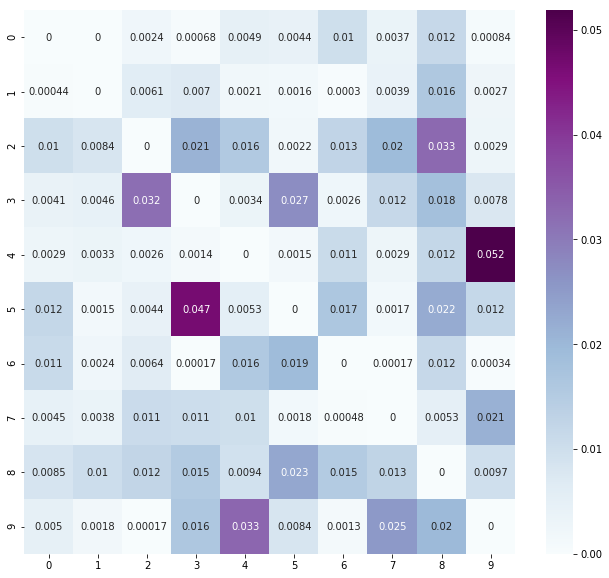

In [153]:
import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

# 3.7(e)

In [235]:
X_train, X_test, y_train, y_test = X[:55000], X[55000:], y[:55000], y[55000:]
shuffle_index = np.random.permutation(55000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
mlp=MLPClassifier(hidden_layer_sizes=50, verbose=True, activation="logistic",learning_rate_init=0.0001, batch_size=300, learning_rate='constant')

In [236]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 1.85347064
Iteration 2, loss = 1.29831418
Iteration 3, loss = 1.01083686


c:\users\vrish\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='logistic', alpha=0.0001, batch_size=300, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.0001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [216]:
y_pred=mlp.predict(X_test)

In [217]:
accuracy_score(y_pred, y_test)

0.86346666666666672

In [218]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X_train, y_train, cv=3, scoring="accuracy")

Iteration 1, loss = 1.94760477
Iteration 2, loss = 1.45647876
Iteration 3, loss = 1.19659297
Iteration 4, loss = 1.02460914
Iteration 5, loss = 0.90301645
Iteration 6, loss = 0.80742193
Iteration 7, loss = 0.73091238
Iteration 8, loss = 0.66714863
Iteration 9, loss = 0.61482458
Iteration 10, loss = 0.57110425
Iteration 11, loss = 0.53342299
Iteration 12, loss = 0.50124641
Iteration 13, loss = 0.47261058
Iteration 14, loss = 0.44819569
Iteration 15, loss = 0.42665516
Iteration 16, loss = 0.40724801
Iteration 17, loss = 0.39080885
Iteration 18, loss = 0.37491975
Iteration 19, loss = 0.36017629
Iteration 20, loss = 0.34728735
Iteration 21, loss = 0.33458932
Iteration 22, loss = 0.32401227
Iteration 23, loss = 0.31351126
Iteration 24, loss = 0.30431874
Iteration 25, loss = 0.29513774
Iteration 26, loss = 0.28701209
Iteration 27, loss = 0.27975463
Iteration 28, loss = 0.27174309
Iteration 29, loss = 0.26470684
Iteration 30, loss = 0.25839572
Iteration 31, loss = 0.25225177
Iteration 32, los

Iteration 111, loss = 0.11453581
Iteration 112, loss = 0.11453780
Iteration 113, loss = 0.11408810
Iteration 114, loss = 0.11319592
Iteration 115, loss = 0.11347087
Iteration 116, loss = 0.11320110
Iteration 117, loss = 0.11202730
Iteration 118, loss = 0.11157807
Iteration 119, loss = 0.11115134
Iteration 120, loss = 0.11036760
Iteration 121, loss = 0.11032112
Iteration 122, loss = 0.11028512
Iteration 123, loss = 0.10895915
Iteration 124, loss = 0.10904767
Iteration 125, loss = 0.10778118
Iteration 126, loss = 0.10684269
Iteration 127, loss = 0.10682353
Iteration 128, loss = 0.10653644
Iteration 129, loss = 0.10543805
Iteration 130, loss = 0.10629840
Iteration 131, loss = 0.10596437
Iteration 132, loss = 0.10499145
Iteration 133, loss = 0.10455487
Iteration 134, loss = 0.10408667
Iteration 135, loss = 0.10350777
Iteration 136, loss = 0.10346599
Iteration 137, loss = 0.10261144
Iteration 138, loss = 0.10296503
Iteration 139, loss = 0.10233915
Iteration 140, loss = 0.10331887
Iteration 

array([ 0.93352601,  0.93448614,  0.93966176])

In [219]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(mlp, X_train, y_train, cv=3)
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

Iteration 1, loss = 1.89175415
Iteration 2, loss = 1.37994016
Iteration 3, loss = 1.12765763
Iteration 4, loss = 0.96824353
Iteration 5, loss = 0.85781374
Iteration 6, loss = 0.77014087
Iteration 7, loss = 0.70001278
Iteration 8, loss = 0.64291955
Iteration 9, loss = 0.59551359
Iteration 10, loss = 0.55516147
Iteration 11, loss = 0.52109504
Iteration 12, loss = 0.49118821
Iteration 13, loss = 0.46377785
Iteration 14, loss = 0.44196017
Iteration 15, loss = 0.42013570
Iteration 16, loss = 0.40175783
Iteration 17, loss = 0.38481483
Iteration 18, loss = 0.37000840
Iteration 19, loss = 0.35540845
Iteration 20, loss = 0.34342941
Iteration 21, loss = 0.33095593
Iteration 22, loss = 0.32062346
Iteration 23, loss = 0.31068236
Iteration 24, loss = 0.30213053
Iteration 25, loss = 0.29353109
Iteration 26, loss = 0.28489066
Iteration 27, loss = 0.27715923
Iteration 28, loss = 0.27052605
Iteration 29, loss = 0.26337299
Iteration 30, loss = 0.25698118
Iteration 31, loss = 0.25064150
Iteration 32, los

Iteration 11, loss = 0.54830717
Iteration 12, loss = 0.51482667
Iteration 13, loss = 0.48630619
Iteration 14, loss = 0.46078492
Iteration 15, loss = 0.43894281
Iteration 16, loss = 0.41910217
Iteration 17, loss = 0.40169798
Iteration 18, loss = 0.38429510
Iteration 19, loss = 0.36933200
Iteration 20, loss = 0.35610039
Iteration 21, loss = 0.34353239
Iteration 22, loss = 0.33227111
Iteration 23, loss = 0.32211611
Iteration 24, loss = 0.31282195
Iteration 25, loss = 0.30436387
Iteration 26, loss = 0.29556861
Iteration 27, loss = 0.28712604
Iteration 28, loss = 0.27950383
Iteration 29, loss = 0.27359640
Iteration 30, loss = 0.26731845
Iteration 31, loss = 0.26065584
Iteration 32, loss = 0.25487123
Iteration 33, loss = 0.24939245
Iteration 34, loss = 0.24367124
Iteration 35, loss = 0.23909264
Iteration 36, loss = 0.23502559
Iteration 37, loss = 0.23023266
Iteration 38, loss = 0.22576278
Iteration 39, loss = 0.22217498
Iteration 40, loss = 0.21852452
Iteration 41, loss = 0.21508752
Iteratio

array([[5734,    1,   26,   15,   16,   37,   51,    6,   36,    1],
       [   0, 6542,   45,   28,   13,   27,    2,   21,   63,    1],
       [  47,   24, 5427,   95,   74,   19,   70,   78,  122,    2],
       [  20,   13,  142, 5539,    8,  201,   10,   78,  105,   15],
       [   8,   26,   43,    5, 5582,    8,   49,   27,   41,   53],
       [  61,   22,   36,  182,   46, 4837,   67,   26,  135,    9],
       [  39,   15,   37,    2,   40,   82, 5666,    2,   34,    1],
       [  22,   33,   63,   41,   62,   16,    4, 5966,   21,   37],
       [  40,   92,   72,  132,   53,  150,   37,   22, 5229,   24],
       [  13,    3,    5,   22,  101,    5,    0,   99,   17,  684]], dtype=int64)

In [220]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

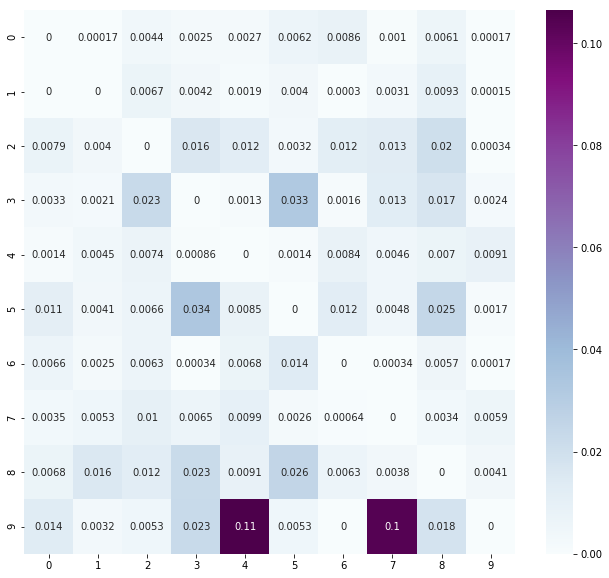

In [221]:
import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

# 3.8(a) Two hidden Layer

In [241]:
X_train, X_test, y_train, y_test = X[:65000], X[65000:], y[:65000], y[65000:]
shuffle_index = np.random.permutation(65000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

mlp=MLPClassifier(hidden_layer_sizes=(10,10), verbose=True, activation="relu",learning_rate_init=0.0001, batch_size=100, learning_rate='adaptive')

In [242]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 7.66257793
Iteration 2, loss = 2.42424262
Iteration 3, loss = 2.35138772
Iteration 4, loss = 2.30599947
Iteration 5, loss = 2.25141638
Iteration 6, loss = 2.20799500
Iteration 7, loss = 2.17100957
Iteration 8, loss = 2.13788960
Iteration 9, loss = 2.11168900
Iteration 10, loss = 2.08705275
Iteration 11, loss = 2.03535178
Iteration 12, loss = 1.87841753
Iteration 13, loss = 1.79582922
Iteration 14, loss = 1.71635432
Iteration 15, loss = 1.55574418
Iteration 16, loss = 1.46849486
Iteration 17, loss = 1.39243439
Iteration 18, loss = 1.32080981
Iteration 19, loss = 1.25253995
Iteration 20, loss = 1.18777848
Iteration 21, loss = 1.13123684
Iteration 22, loss = 1.08536462
Iteration 23, loss = 1.04703516
Iteration 24, loss = 1.01299860
Iteration 25, loss = 0.97895562
Iteration 26, loss = 0.94460860
Iteration 27, loss = 0.91535144
Iteration 28, loss = 0.88650691
Iteration 29, loss = 0.86062598
Iteration 30, loss = 0.83853994
Iteration 31, loss = 0.81901755
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size=100, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='adaptive',
       learning_rate_init=0.0001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [243]:
y_pred=mlp.predict(X_test)

In [244]:
accuracy_score(y_pred, y_test)

0.91200000000000003

In [245]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X_train, y_train, cv=3, scoring="accuracy")

Iteration 1, loss = 6.15824847
Iteration 2, loss = 2.56731425
Iteration 3, loss = 2.43760847
Iteration 4, loss = 2.38822077
Iteration 5, loss = 2.36320800
Iteration 6, loss = 2.34694924
Iteration 7, loss = 2.33466553
Iteration 8, loss = 2.32515809
Iteration 9, loss = 2.31785920
Iteration 10, loss = 2.31233627
Iteration 11, loss = 2.30799521
Iteration 12, loss = 2.30421328
Iteration 13, loss = 2.29423859
Iteration 14, loss = 2.18818820
Iteration 15, loss = 2.10087847
Iteration 16, loss = 1.98217525
Iteration 17, loss = 1.86116197
Iteration 18, loss = 1.75269759
Iteration 19, loss = 1.68799009
Iteration 20, loss = 1.64111856
Iteration 21, loss = 1.60670966
Iteration 22, loss = 1.57785854
Iteration 23, loss = 1.55006406
Iteration 24, loss = 1.52010348
Iteration 25, loss = 1.46978298
Iteration 26, loss = 1.42081042
Iteration 27, loss = 1.38047656
Iteration 28, loss = 1.34784620
Iteration 29, loss = 1.32328953
Iteration 30, loss = 1.27331265
Iteration 31, loss = 1.17885609
Iteration 32, los

c:\users\vrish\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 6.35392739
Iteration 2, loss = 2.41915753
Iteration 3, loss = 2.30873402
Iteration 4, loss = 2.20997444
Iteration 5, loss = 2.01348064
Iteration 6, loss = 1.81997028
Iteration 7, loss = 1.66428332
Iteration 8, loss = 1.55294269
Iteration 9, loss = 1.46756551
Iteration 10, loss = 1.40129186
Iteration 11, loss = 1.34961632
Iteration 12, loss = 1.28869861
Iteration 13, loss = 1.21436412
Iteration 14, loss = 1.17351900
Iteration 15, loss = 1.13710505
Iteration 16, loss = 1.10642855
Iteration 17, loss = 1.07528289
Iteration 18, loss = 1.04734654
Iteration 19, loss = 1.01838473
Iteration 20, loss = 0.99003179
Iteration 21, loss = 0.94583157
Iteration 22, loss = 0.88759202
Iteration 23, loss = 0.85110547
Iteration 24, loss = 0.82680784
Iteration 25, loss = 0.80723859
Iteration 26, loss = 0.78717379
Iteration 27, loss = 0.76931014
Iteration 28, loss = 0.75333369
Iteration 29, loss = 0.73549202
Iteration 30, loss = 0.71826156
Iteration 31, loss = 0.70149783
Iteration 32, los

Iteration 103, loss = 0.38888906
Iteration 104, loss = 0.38672599
Iteration 105, loss = 0.38554044
Iteration 106, loss = 0.38221805
Iteration 107, loss = 0.37992675
Iteration 108, loss = 0.37800925
Iteration 109, loss = 0.37472887
Iteration 110, loss = 0.37242264
Iteration 111, loss = 0.36960471
Iteration 112, loss = 0.36780209
Iteration 113, loss = 0.36591853
Iteration 114, loss = 0.36507687
Iteration 115, loss = 0.36231301
Iteration 116, loss = 0.36103161
Iteration 117, loss = 0.35860952
Iteration 118, loss = 0.35634339
Iteration 119, loss = 0.35487599
Iteration 120, loss = 0.35244303
Iteration 121, loss = 0.34929151
Iteration 122, loss = 0.34667324
Iteration 123, loss = 0.34524290
Iteration 124, loss = 0.34048803
Iteration 125, loss = 0.33960917
Iteration 126, loss = 0.33783296
Iteration 127, loss = 0.33511058
Iteration 128, loss = 0.33266329
Iteration 129, loss = 0.33142175
Iteration 130, loss = 0.32922808
Iteration 131, loss = 0.32677467
Iteration 132, loss = 0.32571761
Iteration 

c:\users\vrish\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([ 0.91462852,  0.89979692,  0.89701809])

In [246]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(mlp, X_train, y_train, cv=3)
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

Iteration 1, loss = 6.41069546
Iteration 2, loss = 2.29994468
Iteration 3, loss = 2.12712623
Iteration 4, loss = 2.03730560
Iteration 5, loss = 1.97744305
Iteration 6, loss = 1.93406662
Iteration 7, loss = 1.90102686
Iteration 8, loss = 1.87195308
Iteration 9, loss = 1.84406808
Iteration 10, loss = 1.81079475
Iteration 11, loss = 1.77394425
Iteration 12, loss = 1.73261663
Iteration 13, loss = 1.69140135
Iteration 14, loss = 1.65620092
Iteration 15, loss = 1.63068744
Iteration 16, loss = 1.60649156
Iteration 17, loss = 1.58367225
Iteration 18, loss = 1.55920970
Iteration 19, loss = 1.51992134
Iteration 20, loss = 1.47354119
Iteration 21, loss = 1.43590781
Iteration 22, loss = 1.40982877
Iteration 23, loss = 1.38809929
Iteration 24, loss = 1.36568955
Iteration 25, loss = 1.33399382
Iteration 26, loss = 1.26871591
Iteration 27, loss = 1.21507401
Iteration 28, loss = 1.18161928
Iteration 29, loss = 1.15435025
Iteration 30, loss = 1.12825827
Iteration 31, loss = 1.09856882
Iteration 32, los

c:\users\vrish\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 10.60125309
Iteration 2, loss = 2.52792271
Iteration 3, loss = 2.15708879
Iteration 4, loss = 2.05223593
Iteration 5, loss = 1.99400814
Iteration 6, loss = 1.95046153
Iteration 7, loss = 1.91286628
Iteration 8, loss = 1.87577376
Iteration 9, loss = 1.83133325
Iteration 10, loss = 1.76757277
Iteration 11, loss = 1.71145732
Iteration 12, loss = 1.61981108
Iteration 13, loss = 1.51801075
Iteration 14, loss = 1.44780000
Iteration 15, loss = 1.39112814
Iteration 16, loss = 1.34712867
Iteration 17, loss = 1.31127406
Iteration 18, loss = 1.28026691
Iteration 19, loss = 1.25331067
Iteration 20, loss = 1.22969365
Iteration 21, loss = 1.20457705
Iteration 22, loss = 1.18197294
Iteration 23, loss = 1.15962230
Iteration 24, loss = 1.14016830
Iteration 25, loss = 1.11968554
Iteration 26, loss = 1.10146903
Iteration 27, loss = 1.03148017
Iteration 28, loss = 0.96423311
Iteration 29, loss = 0.93318722
Iteration 30, loss = 0.90090805
Iteration 31, loss = 0.86264670
Iteration 32, lo

c:\users\vrish\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 6.56025217
Iteration 2, loss = 2.37379799
Iteration 3, loss = 2.21684701
Iteration 4, loss = 2.10775505
Iteration 5, loss = 2.02571545
Iteration 6, loss = 1.95609815
Iteration 7, loss = 1.84979620
Iteration 8, loss = 1.74670279
Iteration 9, loss = 1.66265416
Iteration 10, loss = 1.55247750
Iteration 11, loss = 1.44457059
Iteration 12, loss = 1.36631433
Iteration 13, loss = 1.29675612
Iteration 14, loss = 1.23132845
Iteration 15, loss = 1.17829086
Iteration 16, loss = 1.13796424
Iteration 17, loss = 1.09996880
Iteration 18, loss = 1.05886314
Iteration 19, loss = 1.02189013
Iteration 20, loss = 0.98942936
Iteration 21, loss = 0.96446862
Iteration 22, loss = 0.94390566
Iteration 23, loss = 0.92873370
Iteration 24, loss = 0.91351572
Iteration 25, loss = 0.90151944
Iteration 26, loss = 0.89065952
Iteration 27, loss = 0.88056853
Iteration 28, loss = 0.87258450
Iteration 29, loss = 0.86364153
Iteration 30, loss = 0.85613776
Iteration 31, loss = 0.83870034
Iteration 32, los

c:\users\vrish\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([[6582,    1,   27,   13,   16,   29,  117,   12,   99,    7],
       [   2, 7582,   47,   58,   15,   11,    9,   15,  122,   16],
       [  44,   36, 6129,  184,   81,   10,  150,   62,  287,    7],
       [  15,   15,  181, 6146,   10,  238,   26,   76,  395,   39],
       [  26,   17,   31,    4, 6123,    3,  138,   19,   71,  253],
       [  48,   15,   16,  421,   20, 4615,   90,   14,  136,   46],
       [  71,   16,   49,    8,   59,   72, 5532,    1,  110,    0],
       [  22,   26,   74,   42,   77,   18,    3, 5703,   49,  251],
       [  59,   67,   90,  251,   65,   83,  121,   12, 5045,   58],
       [  35,    8,    3,  102,  371,   36,    9,  166,   88, 5131]], dtype=int64)

In [247]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

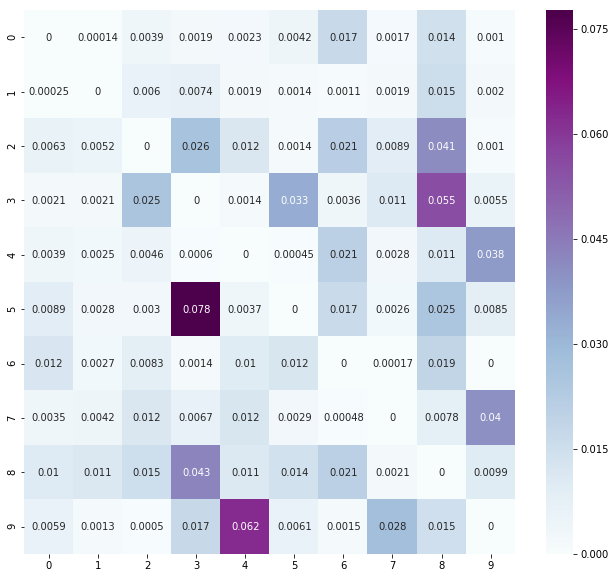

In [248]:
import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

# 3.8(b)

In [254]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

mlp=MLPClassifier(hidden_layer_sizes=(25,25), verbose=True, activation="logistic",learning_rate_init=0.001, batch_size=200, learning_rate='adaptive')

In [255]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 1.79559528
Iteration 2, loss = 0.96843894
Iteration 3, loss = 0.63242723
Iteration 4, loss = 0.51256473
Iteration 5, loss = 0.44358493
Iteration 6, loss = 0.40992697
Iteration 7, loss = 0.37175795
Iteration 8, loss = 0.35623540
Iteration 9, loss = 0.35223739
Iteration 10, loss = 0.34602834
Iteration 11, loss = 0.32681613
Iteration 12, loss = 0.33169554
Iteration 13, loss = 0.31543967
Iteration 14, loss = 0.31009714
Iteration 15, loss = 0.30874496
Iteration 16, loss = 0.30200199
Iteration 17, loss = 0.30251525
Iteration 18, loss = 0.29268379
Iteration 19, loss = 0.29095602
Iteration 20, loss = 0.28453167
Iteration 21, loss = 0.28195828
Iteration 22, loss = 0.27784771
Iteration 23, loss = 0.27685398
Iteration 24, loss = 0.26785301
Iteration 25, loss = 0.27301789
Iteration 26, loss = 0.26751465
Iteration 27, loss = 0.26589784
Iteration 28, loss = 0.27363511
Iteration 29, loss = 0.26284021
Iteration 30, loss = 0.25044267
Iteration 31, loss = 0.24371497
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=200, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25, 25), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [256]:
y_pred=mlp.predict(X_test)

In [257]:
accuracy_score(y_pred, y_test)

0.92420000000000002

In [253]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X_train, y_train, cv=3, scoring="accuracy")

Iteration 1, loss = 2.28692849
Iteration 2, loss = 2.22325231
Iteration 3, loss = 2.17382574
Iteration 4, loss = 2.12054236
Iteration 5, loss = 2.06297300
Iteration 6, loss = 2.00421404
Iteration 7, loss = 1.94697971
Iteration 8, loss = 1.89198950
Iteration 9, loss = 1.83873552
Iteration 10, loss = 1.78802300
Iteration 11, loss = 1.73794870
Iteration 12, loss = 1.68938464
Iteration 13, loss = 1.64250712
Iteration 14, loss = 1.59806031
Iteration 15, loss = 1.55442226
Iteration 16, loss = 1.51347714
Iteration 17, loss = 1.47338403
Iteration 18, loss = 1.43543533
Iteration 19, loss = 1.39992979
Iteration 20, loss = 1.36384735
Iteration 21, loss = 1.32918143
Iteration 22, loss = 1.29586103
Iteration 23, loss = 1.26413768
Iteration 24, loss = 1.23399450
Iteration 25, loss = 1.20479970
Iteration 26, loss = 1.17621020
Iteration 27, loss = 1.14697901
Iteration 28, loss = 1.11997236
Iteration 29, loss = 1.09265717
Iteration 30, loss = 1.06665819
Iteration 31, loss = 1.04483947
Iteration 32, los

Iteration 89, loss = 0.38204858
Iteration 90, loss = 0.38224001
Iteration 91, loss = 0.37982536
Iteration 92, loss = 0.37572390
Iteration 93, loss = 0.37500455
Iteration 94, loss = 0.37170046
Iteration 95, loss = 0.36996100
Iteration 96, loss = 0.36807183
Iteration 97, loss = 0.36317135
Iteration 98, loss = 0.36199164
Iteration 99, loss = 0.36186798
Iteration 100, loss = 0.36209080
Iteration 101, loss = 0.35765007
Iteration 102, loss = 0.35605602
Iteration 103, loss = 0.35389751
Iteration 104, loss = 0.35350115
Iteration 105, loss = 0.35470793
Iteration 106, loss = 0.34922065
Iteration 107, loss = 0.34800278
Iteration 108, loss = 0.34388783
Iteration 109, loss = 0.34543898
Iteration 110, loss = 0.34335431
Iteration 111, loss = 0.34219312
Iteration 112, loss = 0.33985204
Iteration 113, loss = 0.33914302
Iteration 114, loss = 0.33834343
Iteration 115, loss = 0.33793795
Iteration 116, loss = 0.33402327
Iteration 117, loss = 0.33380014
Iteration 118, loss = 0.33338695
Iteration 119, loss =

array([ 0.87378865,  0.88405797,  0.8767079 ])

In [258]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(mlp, X_train, y_train, cv=3)
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

Iteration 1, loss = 2.01571817
Iteration 2, loss = 1.33622820
Iteration 3, loss = 0.92311204
Iteration 4, loss = 0.69502127
Iteration 5, loss = 0.56985093
Iteration 6, loss = 0.49734537
Iteration 7, loss = 0.45219603
Iteration 8, loss = 0.42029508
Iteration 9, loss = 0.39286256
Iteration 10, loss = 0.39634100
Iteration 11, loss = 0.35929825
Iteration 12, loss = 0.35146360
Iteration 13, loss = 0.35097291
Iteration 14, loss = 0.34064409
Iteration 15, loss = 0.34587613
Iteration 16, loss = 0.34130533
Iteration 17, loss = 0.32796379
Iteration 18, loss = 0.31772114
Iteration 19, loss = 0.30556890
Iteration 20, loss = 0.30604479
Iteration 21, loss = 0.30553857
Iteration 22, loss = 0.29106721
Iteration 23, loss = 0.29142460
Iteration 24, loss = 0.28670402
Iteration 25, loss = 0.27581823
Iteration 26, loss = 0.28038628
Iteration 27, loss = 0.28475479
Iteration 28, loss = 0.26835896
Iteration 29, loss = 0.27115667
Iteration 30, loss = 0.26962128
Iteration 31, loss = 0.26660187
Iteration 32, los

array([[5642,    1,   26,   23,   20,   67,   64,   25,   47,    8],
       [   0, 6483,   29,   60,    9,   25,    6,   28,   84,   18],
       [  48,   74, 5270,  172,   63,   18,   91,   69,  142,   11],
       [  33,   25,  155, 5399,    8,  237,   17,   73,  124,   60],
       [  21,   20,   25,    5, 5399,   12,   80,   14,   24,  242],
       [  93,   18,   32,  225,   53, 4641,   99,   14,  177,   69],
       [  77,   24,   39,    2,   47,   85, 5598,    6,   39,    1],
       [  25,   44,   64,   84,   74,    6,    5, 5693,   20,  250],
       [  25,  104,   64,  132,   48,  192,   37,   42, 5071,  136],
       [  36,   19,    8,   63,  258,   42,    6,  161,   44, 5312]], dtype=int64)

In [259]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

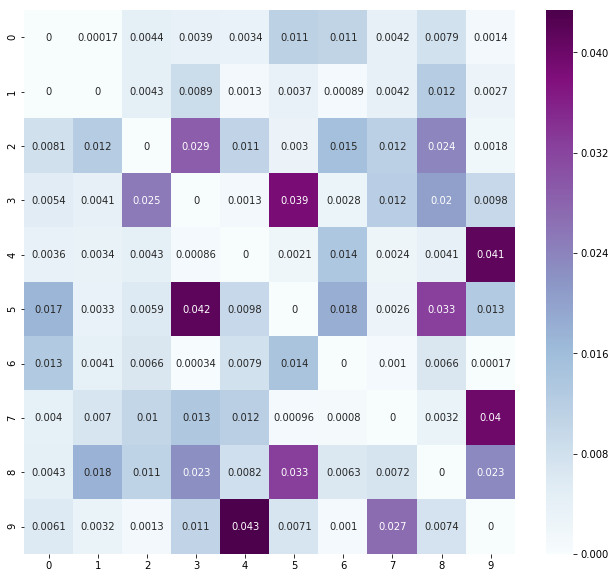

In [260]:
import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

# 3.8(c)

In [19]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

mlp=MLPClassifier(hidden_layer_sizes=(100,100), verbose=True, activation="logistic",learning_rate_init=0.001, batch_size=800, learning_rate='adaptive')

In [20]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 1.61510371
Iteration 2, loss = 0.65899287
Iteration 3, loss = 0.39468907
Iteration 4, loss = 0.31394344
Iteration 5, loss = 0.27478165
Iteration 6, loss = 0.24798551
Iteration 7, loss = 0.22855818
Iteration 8, loss = 0.21515081
Iteration 9, loss = 0.20807614
Iteration 10, loss = 0.19287976
Iteration 11, loss = 0.18390776
Iteration 12, loss = 0.17789436
Iteration 13, loss = 0.17168751
Iteration 14, loss = 0.16921458
Iteration 15, loss = 0.16101732
Iteration 16, loss = 0.15512090
Iteration 17, loss = 0.15057764
Iteration 18, loss = 0.15182243
Iteration 19, loss = 0.14804639
Iteration 20, loss = 0.14972640
Iteration 21, loss = 0.14068869
Iteration 22, loss = 0.13882014
Iteration 23, loss = 0.14298365
Iteration 24, loss = 0.13719634
Iteration 25, loss = 0.13134724
Iteration 26, loss = 0.12670228
Iteration 27, loss = 0.12438091
Iteration 28, loss = 0.12480779
Iteration 29, loss = 0.12445860
Iteration 30, loss = 0.12002276
Iteration 31, loss = 0.11696372
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=800, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [21]:
y_pred=mlp.predict(X_test)

In [22]:
accuracy_score(y_pred, y_test)

0.96179999999999999

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X_train, y_train, cv=3, scoring="accuracy")

Iteration 1, loss = 1.84168826
Iteration 2, loss = 0.96388788
Iteration 3, loss = 0.53579738
Iteration 4, loss = 0.39155967
Iteration 5, loss = 0.32900695
Iteration 6, loss = 0.29172927
Iteration 7, loss = 0.27021446
Iteration 8, loss = 0.25127131
Iteration 9, loss = 0.23251480
Iteration 10, loss = 0.22071309
Iteration 11, loss = 0.21011041
Iteration 12, loss = 0.20436458
Iteration 13, loss = 0.19882985
Iteration 14, loss = 0.19093278
Iteration 15, loss = 0.17970898
Iteration 16, loss = 0.17433658
Iteration 17, loss = 0.17286588
Iteration 18, loss = 0.16496859
Iteration 19, loss = 0.16088677
Iteration 20, loss = 0.15909472
Iteration 21, loss = 0.16081662
Iteration 22, loss = 0.15210929
Iteration 23, loss = 0.15328594
Iteration 24, loss = 0.15105265
Iteration 25, loss = 0.14586935
Iteration 26, loss = 0.14070276
Iteration 27, loss = 0.13940780
Iteration 28, loss = 0.14571271
Iteration 29, loss = 0.13928980
Iteration 30, loss = 0.13431702
Iteration 31, loss = 0.14009654
Iteration 32, los

array([ 0.95005999,  0.94589729,  0.94479172])

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(mlp, X_train, y_train, cv=3)
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

Iteration 1, loss = 1.83602311
Iteration 2, loss = 0.97478319
Iteration 3, loss = 0.55646126
Iteration 4, loss = 0.40643428
Iteration 5, loss = 0.33515943
Iteration 6, loss = 0.30222079
Iteration 7, loss = 0.27407912
Iteration 8, loss = 0.25448212
Iteration 9, loss = 0.24294934
Iteration 10, loss = 0.22954643
Iteration 11, loss = 0.22026933
Iteration 12, loss = 0.20970175
Iteration 13, loss = 0.20027900
Iteration 14, loss = 0.19406951
Iteration 15, loss = 0.18552528
Iteration 16, loss = 0.18422492
Iteration 17, loss = 0.17754851
Iteration 18, loss = 0.17029072
Iteration 19, loss = 0.16751420
Iteration 20, loss = 0.16730066
Iteration 21, loss = 0.15756448
Iteration 22, loss = 0.15940440
Iteration 23, loss = 0.15421789
Iteration 24, loss = 0.15059853
Iteration 25, loss = 0.15005391
Iteration 26, loss = 0.14751451
Iteration 27, loss = 0.14570582
Iteration 28, loss = 0.14006074
Iteration 29, loss = 0.13702868
Iteration 30, loss = 0.13737853
Iteration 31, loss = 0.14105014
Iteration 32, los

array([[5755,    1,   16,    9,    9,   26,   56,   10,   34,    7],
       [   0, 6579,   49,   17,    9,   10,   13,   19,   35,   11],
       [  30,   19, 5625,   49,   50,   12,   35,   56,   77,    5],
       [  18,   16,  107, 5686,    5,  127,   10,   47,   87,   28],
       [   6,   20,   37,    3, 5551,    3,   52,   16,   17,  137],
       [  41,   12,   19,  162,   32, 4969,   62,   12,   80,   32],
       [  46,   11,   23,    1,   26,   48, 5727,    1,   35,    0],
       [  18,   23,   60,   38,   46,    6,    1, 5976,   13,   84],
       [  34,   56,   53,   82,   16,   84,   43,   13, 5420,   50],
       [  32,   15,    9,   64,  179,   36,    3,  116,   44, 5451]], dtype=int64)

In [25]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

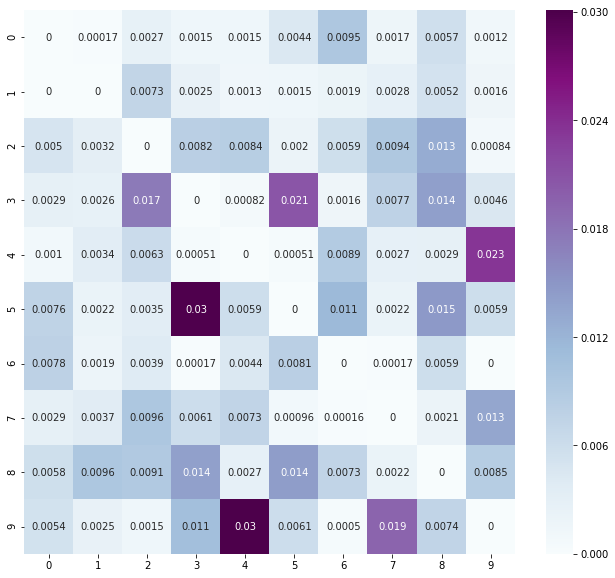

In [26]:
import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")

# 3.8 (d)

In [261]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

mlp=MLPClassifier(hidden_layer_sizes=(60,60), verbose=True, activation="relu",learning_rate_init=0.001, batch_size=250, learning_rate='constant')

In [262]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 2.68518286
Iteration 2, loss = 0.82421008
Iteration 3, loss = 0.50570524
Iteration 4, loss = 0.36012724
Iteration 5, loss = 0.27659496
Iteration 6, loss = 0.23323547
Iteration 7, loss = 0.19664481
Iteration 8, loss = 0.17054723
Iteration 9, loss = 0.15113934
Iteration 10, loss = 0.13891675
Iteration 11, loss = 0.12925874
Iteration 12, loss = 0.12398136
Iteration 13, loss = 0.10978937
Iteration 14, loss = 0.10699574
Iteration 15, loss = 0.09944720
Iteration 16, loss = 0.09324569
Iteration 17, loss = 0.09436306
Iteration 18, loss = 0.08524759
Iteration 19, loss = 0.08581811
Iteration 20, loss = 0.08487605
Iteration 21, loss = 0.07858193
Iteration 22, loss = 0.08592536
Iteration 23, loss = 0.07723746
Iteration 24, loss = 0.07897899
Iteration 25, loss = 0.07726638
Iteration 26, loss = 0.07232929
Iteration 27, loss = 0.07107463
Iteration 28, loss = 0.06305305
Iteration 29, loss = 0.06024711
Iteration 30, loss = 0.05304587
Iteration 31, loss = 0.06095906
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size=250, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60, 60), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [263]:
y_pred=mlp.predict(X_test)

In [264]:
accuracy_score(y_pred, y_test)

0.95620000000000005

In [265]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X_train, y_train, cv=3, scoring="accuracy")

Iteration 1, loss = 3.16600494
Iteration 2, loss = 0.83969642
Iteration 3, loss = 0.52540907
Iteration 4, loss = 0.39391722
Iteration 5, loss = 0.31672048
Iteration 6, loss = 0.26850566
Iteration 7, loss = 0.23398051
Iteration 8, loss = 0.20559374
Iteration 9, loss = 0.18314137
Iteration 10, loss = 0.16280273
Iteration 11, loss = 0.15099017
Iteration 12, loss = 0.13958156
Iteration 13, loss = 0.12568635
Iteration 14, loss = 0.12065245
Iteration 15, loss = 0.12071924
Iteration 16, loss = 0.10666888
Iteration 17, loss = 0.10234126
Iteration 18, loss = 0.10127067
Iteration 19, loss = 0.09593363
Iteration 20, loss = 0.09416526
Iteration 21, loss = 0.09011727
Iteration 22, loss = 0.09038694
Iteration 23, loss = 0.08224733
Iteration 24, loss = 0.08002510
Iteration 25, loss = 0.07132903
Iteration 26, loss = 0.08183556
Iteration 27, loss = 0.08620090
Iteration 28, loss = 0.07275112
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 4.

array([ 0.93911218,  0.94514726,  0.94589188])

In [266]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(mlp, X_train, y_train, cv=3)
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

Iteration 1, loss = 3.33996962
Iteration 2, loss = 1.00470220
Iteration 3, loss = 0.62395687
Iteration 4, loss = 0.43799083
Iteration 5, loss = 0.34027525
Iteration 6, loss = 0.28142890
Iteration 7, loss = 0.22452528
Iteration 8, loss = 0.19359727
Iteration 9, loss = 0.17046672
Iteration 10, loss = 0.15075836
Iteration 11, loss = 0.13467913
Iteration 12, loss = 0.12909358
Iteration 13, loss = 0.11377833
Iteration 14, loss = 0.10280896
Iteration 15, loss = 0.09814163
Iteration 16, loss = 0.09355265
Iteration 17, loss = 0.09214069
Iteration 18, loss = 0.07889408
Iteration 19, loss = 0.07968702
Iteration 20, loss = 0.07695081
Iteration 21, loss = 0.07603983
Iteration 22, loss = 0.07635690
Iteration 23, loss = 0.07308058
Iteration 24, loss = 0.07440172
Iteration 25, loss = 0.08726708
Iteration 26, loss = 0.07093383
Iteration 27, loss = 0.07198984
Iteration 28, loss = 0.07046097
Iteration 29, loss = 0.06622540
Iteration 30, loss = 0.05690162
Iteration 31, loss = 0.05226171
Iteration 32, los

array([[5743,    0,   23,    8,   17,   16,   39,    9,   54,   14],
       [   1, 6504,   36,   17,   26,    8,    9,   14,  120,    7],
       [  49,   21, 5598,   72,   38,   15,   22,   50,   86,    7],
       [  12,   12,   96, 5609,    4,  181,   10,   34,  125,   48],
       [  10,   15,   23,    4, 5621,    3,   31,   19,   27,   89],
       [  42,    4,   15,   84,   14, 5028,   64,   15,   95,   60],
       [  49,    7,   12,    4,   38,   50, 5729,    2,   26,    1],
       [  10,   24,   56,   37,   36,   11,    2, 5960,   27,  102],
       [  23,   21,   48,   55,   22,   58,   31,   10, 5534,   49],
       [  24,    8,    6,   40,  169,   27,    4,  109,   85, 5477]], dtype=int64)

In [267]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

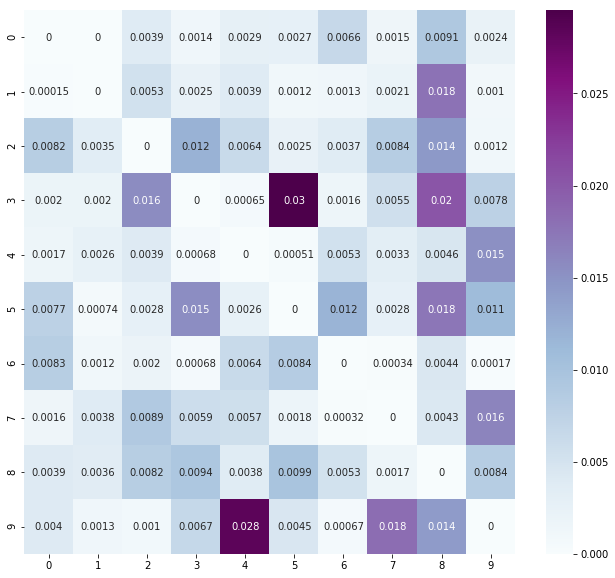

In [268]:
import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)
ax = plt.subplots(figsize=(11, 10))
sns.heatmap(norm_conf_mx, annot=True, cmap="BuPu")